<a href="https://colab.research.google.com/github/bbucalonserra/data_analysis_and_best_practices/blob/main/Project_Woman_Violance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP Análise de Dados e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

## 1. Definição do Problema

"*Um projeto de ciência de dados se inicia com uma necessidade ou ideia, compondo a etapa de definição do problema. Nesta etapa inicial, deve-se primeiro considerar o problema em que se deseja resolver. Em seguida, os objetivos devem ser definidos e devem-se elencar as perguntas que os gestores ou stakeholders desejam responder.*"


### 1.1 Problema a ser Resolvido
A incidência de violência contra a mulher no estado de Minas Gerais representa uma preocupação social significativa. A falta de uma análise detalhada dos dados disponíveis dificulta a compreensão dos padrões, das áreas críticas e dos fatores subjacentes a esse fenômeno, dificultando assim a implementação de estratégias direcionadas e eficazes para combater esse problema.

### 1.2 Objetivos
O objetivo central é identificar possíveis causas e pontos críticos por meio da análise de dados específicos, com o intuito de fornecer subsídios para a formulação de estratégias e políticas mais eficazes na prevenção e combate a esse tipo de violência. A análise aprofundada desses dados é crucial para orientar intervenções mais direcionadas e promover um ambiente mais seguro e inclusivo para as mulheres nessa região.
Tem-se algumas opções para o problema em si, podendo ser realizado:

*      Regressão: usada quando se estiver lidando com um problema em que a saída desejada é uma variável contínua. Por exemplo, prever preços, temperatura, quantidade de vendas etc.
*     Classificação: quando a saída desejada é uma variável categórica ou discreta, como prever se um e-mail é spam ou não (classificação binária) ou identificar o tipo de animal em uma imagem (classificação multiclasse), a classificação é mais apropriada
*      Aprendizado Supervisionado: caso os dados contêm pares de entrada e saída esperada, ou seja, se tem dados rotulados (entradas com correspondentes saídas conhecidas), é provável que você esteja lidando com um problema supervisionado
*      Aprendizado Não Supervisionado: Se está explorando padrões nos dados sem a presença de rótulos ou saídas conhecidas, pode ser um problema não supervisionado. Algoritmos como clustering (agrupamento) ou redução de dimensionalidade (como PCA) são exemplos de métodos não supervisionados




Como os dados são referentes a eventos de violência contra a mulher, o problema **pode ser adequado para trabalhos de classificação (classificação binária ou multiclasse para prever, por exemplo, se uma vítima sofrerá violência novamente com base em características como idade, sexo, raça, localização, histórico de violência etc.) e métodos não supervisionados como análise de dados e padrões ( métodos não supervisionados, como clustering, podem ser utilizados para identificar padrões nos dados, por exemplo, agrupar vítimas com características semelhantes.)**

### 1.3 Principais Perguntas e Insights

1. Quais são os tipos mais comuns de violência contra a mulher em Minas Gerais?
2. Existe uma faixa etária em que a ocorrência de violência contra a mulher é mais frequente?
3. Qual o local de ocorrência mais comum de violência contra a mulher?
4. Os eventos de violência são pontuais? Existiram outras agressões?
4. Em relação a raça das vítimas, existe alguma predominante?

### 1.4 Atributos do Dataset
Os atributos dos datasets utilizados são:

1. **DT_NOTIFIC**: Data da notificação da violência
2. **DT_NASC**: Data de nascimento da vítima
3. **NU_IDADE_N**: Idade da vítima no momento da notificação
4. **CS_SEXO**: Sexo da vítima
5. **CS_RACA**: Raça/etnia da vítima
6. **ID_MN_RESI**: Identificação do município de residência da vítima
7. **LOCAL_OCOR**: Local da ocorrência da violência
8. **OUT_VEZES**: Se a violência já havia ocorrido antes
9. **LES_AUTOP**: Se a vítima sofreu lesões corporais que necessitaram de atendimento médico
10. **VIOL_FISIC**: Se a vítima sofreu violência física
11. **VIOL_PSICO**: Se a vítima sofreu violência psicológica
12. **VIOL_SEXU**: Se a vítima sofreu violência sexual
13. **NUM_ENVOLV**: Número de envolvidos na violência
14. **AUTOR_SEXO**: Sexo do autor da violência
15. **ORIENT_SEX**: Orientação sexual do autor da violência
16. **IDENT_GEN**: Identidade de gênero do autor da violência

### 1.5 Imports
Como boa prática para programação em Python, irá ser importado todas as bibliotecas necessárias em um único notebook.

In [1]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import requests
import chardet
from mlxtend.preprocessing import TransactionEncoder
import unicodedata
import seaborn as sns
from sklearn import preprocessing
import missingno as ms

## 2 Coleta de Dados
"*A segunda etapa consiste em levantar as informações necessárias e efetivamente coletar os dados para resolver os problemas levantados na etapa anterior. Esses dados são geralmente (mas não obrigatoriamente) organizados em um ou mais bancos de dados (podendo ser bancos de dados relacionais, Data Warehouses, Data Marts ou Data Lakes).*

### 2.1 Fonte

Os dados foram coletados diretamente do site do governo do Brasil, em dados abertos. O link para verificação e consulta do dataset pode ser encontrado aqui: https://dados.gov.br/dados/conjuntos-dados/dados_violencia_geral_ses

### 2.2 Verificação da Estrutura dos Datasets

Nesta etapa, como serão utilizados 5 datasets diferentes (um para cada ano), **será necessário realizar algumas verificações individuais de cada dataset antes de efetuar a concatenação dos mesmos para que nao seja perdido informações e qualidade.**

In [3]:
# Informa a URL de importação do dataset

url_2023 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2023.csv'
url_2022 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_best_practices/main/dataset_woman/dados_violencia_mulheres_ses_2022.csv'
url_2021 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2021.csv'
url_2020 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2020.csv'
url_2019 = 'https://raw.githubusercontent.com/bbucalonserra/data_analysis_and_good_practices/main/dataset_woman/dados_violencia_mulheres_ses_2019.csv'

Será avaliado para cada dataset:

*   Delimitador
*   Colunas existentes
*   Encoding
*   Tipo de Dado


Estas verificações serão cruciais para que, posteriormente, sejam concatenados todos os datasets em apenas um sem haver erros.

#### 2.2.1 Verificação Dataset 1

Primeiramente, é necessário verificar qual é o **delimitador** e o **encoding** do dataset 1 (ano 2023) para que seja possível criar um dataframe a partir dele da forma correta.

In [4]:
# Verificação do Delimitador
# Aqui, será utilizado a função pd.read_csv para ler o arquivo em csv. Além disso, será utilizado o argumento nrows para ler apenas as 5 primeiras linhas
# O "ponto algo" (por exemplo: "df.head()"") coleta o resultado do que está a esquerda do código e passa como primeiro argumento da função a direita
# Logo, para melhor processamento, não foi-se utilizado head() porque  o dataframe seria lido inteiro e apenas depois seria selecionado as 5 primeiras linhas

pd.read_csv(url_2023, nrows = 5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2023-01-02,2008-03-21,14,Feminino,Branca,Rio Novo,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Ignorado
1,2023-01-01,1976-11-29,46,Feminino,Branca,Carmo do Rio Claro,Residencia,Sim,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Ignorado
2,2023-01-02,1997-05-10,25,Feminino,Parda,Pirapora,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
3,2023-01-02,1982-10-02,40,Feminino,Parda,Várzea da Palma,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
4,2023-01-03,2016-11-10,6,Feminino,Parda,Guaraciaba,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino,Não se aplica,Não se aplica


In [5]:
# Verificação do Encoding

response = requests.get(url_2023)
result = chardet.detect(response.content)
print(f"O encoding do arquivo é: {result['encoding']}")

O encoding do arquivo é: UTF-8-SIG


Com as funções utilizadas nos dois notebooks a cima, é possível entender que: o delimitador é "," (visto que, por padrão, ele já foi dividido nas colunas corretamente) e o encoding é UTF-8. Agora, está claro qual a forma correta de ler o arquivo. Logo, pode-se criado um dataframe da forma correta.

In [6]:
df_woman_2023 = pd.read_csv(url_2023, delimiter = ',', header = 0, encoding = 'utf-8')

Com o dataframe criado, é possível verificar quais as **colunas existentes**.

In [7]:
# Verificação de Colunas Existentes

atributos = df_woman_2023.columns
print(f"Número de atributos: {len(atributos)}")
print("Atributos:", atributos)

Número de atributos: 16
Atributos: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Por fim, iremos verificar o tipo dos dados deste dataframe.

In [8]:
# Verificação de Tipologia dos Dados

df_woman_2023.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

#### 2.2.2 Verificação Dataset 2

Primeiramente, é necessário verificar qual é o **delimitador** e o **encoding** do dataset 2 (ano 2022), para que seja possível criar um dataframe a partir dele da forma correta.

In [9]:
# Verificação de Delimitador
# Aqui, será utilizado a função pd.read_csv para ler o arquivo em csv. Além disso, será utilizado o argumento nrows para ler apenas as 5 primeiras linhas
# O "ponto algo" (por exemplo: "df.head()"") coleta o resultado do que está a esquerda do código e passa como primeiro argumento da função a direita
# Logo, para melhor processamento, não foi-se utilizado head() porque  o dataframe seria lido inteiro e apenas depois seria selecionado as 5 primeiras linhas

pd.read_csv(url_2022, nrows = 5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2022-01-02,1999-01-11,22,Feminino,Branca,Campestre,Residencia,Não,Não,Sim,Não,Não,Um,Feminino,Não se aplica,Não se aplica
1,2022-01-18,1978-01-31,43,Feminino,Parda,Timóteo,Residencia,Ignorado,Não,Sim,Não,Não,Um,Masculino,Ignorado,Ignorado
2,2022-01-14,1979-02-07,42,Feminino,Parda,Ipatinga,Ignorado,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Ignorado,Ignorado
3,2022-01-26,1984-10-29,37,Feminino,Branca,Catuji,Via pública,Sim,Não,Sim,Sim,Não,Um,Masculino,Heterossexual,Não se aplica
4,2022-02-04,1970-05-02,51,Feminino,Preta,Catuji,Outro,Não,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica


In [10]:
# Verificação de Encoding

response = requests.get(url_2022)
result = chardet.detect(response.content)
print(f"O encoding do arquivo é: {result['encoding']}")

O encoding do arquivo é: UTF-8-SIG


Com as funções utilizadas nos dois notebooks a cima, é possível entender que: o delimitador é "," (visto que, por padrão, ele já foi dividido nas colunas corretamente) e o encoding é UTF-8. Agora, está claro qual a forma correta de ler o arquivo. Logo, pode-se criado um dataframe da forma correta.

In [11]:
df_woman_2022 = pd.read_csv(url_2022, delimiter = ',', header = 0, encoding = 'utf-8')

In [12]:
# Verificação de Colunas Existentes

atributos = df_woman_2022.columns
print(f"Número de atributos: {len(atributos)}")
print("Atributos:", atributos)

Número de atributos: 16
Atributos: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Por fim, iremos verificar o tipo dos dados deste dataframe.

In [13]:
# Verificação da Tipologia dos Dados

df_woman_2022.dtypes

DT_NOTIFIC    object
DT_NASC       object
NU_IDADE_N     int64
CS_SEXO       object
CS_RACA       object
ID_MN_RESI    object
LOCAL_OCOR    object
OUT_VEZES     object
LES_AUTOP     object
VIOL_FISIC    object
VIOL_PSICO    object
VIOL_SEXU     object
NUM_ENVOLV    object
AUTOR_SEXO    object
ORIENT_SEX    object
IDENT_GEN     object
dtype: object

#### 2.2.3 Verificação Dataset 3

Primeiramente, é necessário verificar qual é o **delimitador** e o **encoding** do dataset 3 (ano 2021), para que seja possível criar um dataframe a partir dele da forma correta.

In [14]:
# Verificação de Delimitador
# Aqui, será utilizado a função pd.read_csv para ler o arquivo em csv. Além disso, será utilizado o argumento nrows para ler apenas as 5 primeiras linhas
# O "ponto algo" (por exemplo: "df.head()"") coleta o resultado do que está a esquerda do código e passa como primeiro argumento da função a direita
# Logo, para melhor processamento, não foi-se utilizado head() porque  o dataframe seria lido inteiro e apenas depois seria selecionado as 5 primeiras linhas

pd.read_csv(url_2021, nrows = 5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2021-01-20,1998-01-21,22,Feminino,Parda,Ipatinga,Ignorado,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Ignorado,Ignorado
1,2021-03-22,2000-09-17,20,Feminino,Parda,Governador Valadares,Ignorado,Ignorado,Não,Sim,Não,Não,Ignorado,Ignorado,Ignorado,Ignorado
2,2021-03-02,1976-12-15,44,Feminino,Parda,Paracatu,Residencia,Não,Sim,Não,Sim,Não,Um,Feminino,Heterossexual,Não se aplica
3,2021-02-18,2000-09-19,20,Feminino,Parda,Serro,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino,Ignorado,Não se aplica
4,2021-01-28,1966-04-13,54,Feminino,Parda,Itabira,Residencia,Ignorado,Ignorado,Sim,Sim,Não,Um,Feminino,Ignorado,Não se aplica


In [15]:
# Verificação do Encoding

response = requests.get(url_2021)
result = chardet.detect(response.content)
print(f"O encoding do arquivo é: {result['encoding']}")

O encoding do arquivo é: UTF-8-SIG


Com as funções utilizadas nos dois notebooks a cima, é possível entender que: o delimitador é "," (visto que, por padrão, ele já foi dividido nas colunas corretamente) e o encoding é UTF-8. Agora, está claro qual a forma correta de ler o arquivo. Logo, pode-se criado um dataframe da forma correta.

In [16]:
df_woman_2021 = pd.read_csv(url_2021, delimiter = ',', header = 0, encoding = 'utf-8')

Com o dataframe criado, é possivel verificar quais as colunas existentes.

In [17]:
# Verificação das Colunas Existentes

atributos = df_woman_2021.columns
print(f"Número de atributos: {len(atributos)}")
print("Atributos:", atributos)

Número de atributos: 16
Atributos: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Por fim, iremos verificar o tipo dos dados deste dataframe.

In [18]:
# Verificação da Tipologia dos Dados

df_woman_2021.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

#### 2.2.4 Verificação Dataset 4

Primeiramente, é necessário verificar qual é o **delimitador** e o **encoding** do dataset 4 (ano 2020), para que seja possível criar um dataframe a partir dele da forma correta.

In [19]:
# Verificação de Delimitador
# Aqui, será utilizado a função pd.read_csv para ler o arquivo em csv. Além disso, será utilizado o argumento nrows para ler apenas as 5 primeiras linhas
# O "ponto algo" (por exemplo: "df.head()"") coleta o resultado do que está a esquerda do código e passa como primeiro argumento da função a direita
# Logo, para melhor processamento, não foi-se utilizado head() porque  o dataframe seria lido inteiro e apenas depois seria selecionado as 5 primeiras linhas

pd.read_csv(url_2020, nrows = 5)

,DT_NOTIFIC;DT_NASC;NU_IDADE_N;CS_SEXO;CS_RACA;ID_MN_RESI;LOCAL_OCOR;OUT_VEZES;LES_AUTOP;VIOL_FISIC;VIOL_PSICO;VIOL_SEXU;NUM_ENVOLV;AUTOR_SEXO;ORIENT_SEX;IDENT_GEN
0,28/02/2020;30/11/1986;33;Feminino;Parda;Belo H...
1,17/03/2020;12/01/2002;18;Feminino;Ignorado;Bel...
2,05/02/2020;18/09/1996;23;Feminino;Parda;Córreg...
3,03/03/2020;21/05/1980;39;Feminino;Parda;Lagoa ...
4,08/02/2020;04/10/1940;79;Feminino;Branca;Estiv...


In [20]:
# Verificação do Encoding

response = requests.get(url_2020)
result = chardet.detect(response.content)
print(f"O encoding do arquivo é: {result['encoding']}")

O encoding do arquivo é: UTF-8-SIG


Com as funções utilizadas nos dois notebooks a cima, é possível entender que: o delimitador é "," (visto que o Python nao dividiu automaticamente as colunas e, entre cada coluna, há ",") e o encoding = UTF-8. Agora, está claro qual a forma correta de ler o arquivo. Logo, pode-se criado um dataframe da forma correta.

In [21]:
df_woman_2020 = pd.read_csv(url_2020, delimiter = ';', header = 0, encoding = 'utf-8')

Com o dataframe criado, é possivel verificar quais as colunas existentes.

In [22]:
# Verificação das Colunas Existentes

atributos = df_woman_2020.columns
print(f"Número de atributos: {len(atributos)}")
print("Atributos:", atributos)

Número de atributos: 16
Atributos: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Por fim, iremos verificar o tipo dos dados deste dataframe.

In [23]:
# Verificação da Tipologia dos Dados

df_woman_2020.dtypes

DT_NOTIFIC    object
DT_NASC       object
NU_IDADE_N     int64
CS_SEXO       object
CS_RACA       object
ID_MN_RESI    object
LOCAL_OCOR    object
OUT_VEZES     object
LES_AUTOP     object
VIOL_FISIC    object
VIOL_PSICO    object
VIOL_SEXU     object
NUM_ENVOLV    object
AUTOR_SEXO    object
ORIENT_SEX    object
IDENT_GEN     object
dtype: object

#### 2.2.5 Verificação Dataset 5

Primeiramente, é necessário verificar qual é o **delimitador** e o **encoding** do dataset 5 (ano 2019), para que seja possível criar um dataframe a partir dele da forma correta.

In [24]:
# Verificação de Delimitador
# Aqui, será utilizado a função pd.read_csv para ler o arquivo em csv. Além disso, será utilizado o argumento nrows para ler apenas as 5 primeiras linhas
# O "ponto algo" (por exemplo: "df.head()"") coleta o resultado do que está a esquerda do código e passa como primeiro argumento da função a direita
# Logo, para melhor processamento, não foi-se utilizado head() porque  o dataframe seria lido inteiro e apenas depois seria selecionado as 5 primeiras linhas

pd.read_csv(url_2019, nrows = 5)

,DT_NOTIFIC;DT_NASC;NU_IDADE_N;CS_SEXO;CS_RACA;ID_MN_RESI;LOCAL_OCOR;OUT_VEZES;LES_AUTOP;VIOL_FISIC;VIOL_PSICO;VIOL_SEXU;NUM_ENVOLV;AUTOR_SEXO;ORIENT_SEX;IDENT_GEN
0,16/04/2019;31/01/1998;21;Feminino;Parda;Ipatin...
1,16/04/2019;19/10/1974;44;Feminino;Amarela;Sant...
2,16/04/2019;08/07/1988;30;Feminino;Branca;Carat...
3,12/03/2019;19/09/1975;43;Feminino;Amarela;Ubap...
4,12/04/2019;25/07/1989;29;Feminino;Parda;Ubapor...


In [25]:
# Verificação do Encoding

response = requests.get(url_2019)
result = chardet.detect(response.content)
print(f"O encoding do arquivo é: {result['encoding']}")

O encoding do arquivo é: UTF-8-SIG


Com as funções utilizadas nos dois notebooks a cima, é possível entender que: o delimitador é "," (visto que o Python nao dividiu automaticamente as colunas e, entre cada coluna, há ",") e o encoding = UTF-8. Agora, está claro qual a forma correta de ler o arquivo. Logo, pode-se criado um dataframe da forma correta.

In [26]:
df_woman_2019 = pd.read_csv(url_2019, delimiter = ';', header = 0, encoding = 'utf-8')

Com o dataframe criado, é possivel verificar quais as colunas existentes.

In [27]:
# Verificação das Colunas Existentes

atributos = df_woman_2019.columns
print(f"Número de atributos: {len(atributos)}")
print("Atributos:", atributos)

Número de atributos: 16
Atributos: Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


Por fim, iremos verificar o tipo dos dados deste dataframe.

In [28]:
# Verificação da Tipologia dos Dados

df_woman_2019.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

#### 2.2.6 Concatenação de Dataframes

Com as verificações anteriores e dataframes lidos e criados de forma correta, notou-se que eles possuem idênticas:

*   Colunas
*   Encoding
*   Tipologia de Dados

Logo, é possível concatenar os 5 dataframes em apenas um.

In [29]:
# Concatenação dos Dataframes

df_woman = pd.concat([df_woman_2023, df_woman_2022, df_woman_2021, df_woman_2020, df_woman_2019], axis = 0)

In [30]:
# Verificação das 10 primeiras linhas

df_woman.head(10)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,2023-01-02,2008-03-21,14.0,Feminino,Branca,Rio Novo,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Ignorado
1,2023-01-01,1976-11-29,46.0,Feminino,Branca,Carmo do Rio Claro,Residencia,Sim,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Ignorado
2,2023-01-02,1997-05-10,25.0,Feminino,Parda,Pirapora,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
3,2023-01-02,1982-10-02,40.0,Feminino,Parda,Várzea da Palma,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
4,2023-01-03,2016-11-10,6.0,Feminino,Parda,Guaraciaba,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino,Não se aplica,Não se aplica
5,2023-01-03,1968-08-24,54.0,Feminino,Parda,Cajuri,Residencia,Não,Sim,Não,Não,Não,Um,Feminino,Heterossexual,Não se aplica
6,2023-01-03,1976-04-17,46.0,Feminino,Parda,Cajuri,Residencia,Sim,Sim,Não,Não,Não,Um,Masculino,Heterossexual,Não se aplica
7,2023-01-03,1996-06-22,26.0,Feminino,Branca,Raul Soares,Via pública,Sim,Não,Sim,Sim,Não,Um,Feminino,Heterossexual,Não se aplica
8,2023-01-02,1960-06-17,62.0,Feminino,Preta,Raul Soares,Via pública,Ignorado,Não,Não,Sim,Não,Dois ou mais,Feminino,Heterossexual,Não se aplica
9,2023-01-02,1978-01-04,44.0,Feminino,Parda,Varginha,Ignorado,Ignorado,Não,Sim,Não,Não,Um,Masculino,Não se aplica,Não se aplica


In [31]:
# Verificação das 10 últimas linhas

df_woman.tail(10)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
38766,12/11/2019,13/08/1983,36.0,Feminino,Parda,Ipatinga,Ignorado,Não,Não,Sim,Não,Não,Ignorado,Ignorado,Ignorado,Ignorado
38767,11/10/2019,18/09/1987,32.0,Feminino,Branca,Timóteo,Residencia,Sim,Não,Sim,Sim,Não,Dois ou mais,Masculino,Heterossexual,Ignorado
38768,13/08/2019,09/05/1979,40.0,Feminino,Parda,Ipatinga,Ignorado,Não,Sim,Não,Não,Não,Um,Feminino,Ignorado,Ignorado
38769,01/07/2019,19/02/1996,23.0,Feminino,Branca,Ipatinga,Ignorado,Não,Não,Sim,Não,Não,Um,Ignorado,Ignorado,Ignorado
38770,07/01/2019,09/05/1979,39.0,Feminino,Preta,Ipatinga,Residencia,Não,Sim,Não,Não,Não,Um,Feminino,Heterossexual,Não se aplica
38771,08/03/2019,02/08/1983,35.0,Feminino,Parda,Porteirinha,Comercio/Serviços,Não,Não,Não,Não,Sim,Um,Masculino,Heterossexual,Não se aplica
38772,21/05/2019,31/05/2002,16.0,Feminino,Parda,Porteirinha,Residencia,Sim,Não,Sim,Sim,Sim,Um,Masculino,Heterossexual,Não se aplica
38773,20/05/2019,31/03/2007,12.0,Feminino,Branca,Cláudio,Residencia,Não,Não,Não,Não,Sim,Um,Masculino,Heterossexual,Não se aplica
38774,19/09/2019,29/01/1986,32.0,Feminino,Ignorado,Nova Lima,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
38775,01/03/2019,06/11/2000,18.0,Feminino,Branca,Alfenas,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica


Com isto, nota-se que o dataset final foi corretamente concatenado.

## 3 Análise de Dados

*A partir deste ponto, podem ser realizadas operações de ETL (Extraction – extração, Transformation – transformação, Loading – carga) a partir dos dados de origem, com a finalidade de prepará-los para os modelos que serão construídos futuramente.*"

Nesta etapa, é necessário entender quais informações temos disponíveis no nosso dataset.


### 3.1 Análise da Estrutura dos Dados
Nesta etapa irá ser realizado a verificação das dimensões do conjunto de dados, tipos de variáveis e identificação de valores ausentes.


In [32]:
# Para ver os atributos (colunas)

df_woman.columns

Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')

In [33]:
# Para ver o número de instâncias (linhas)

num_instancias = df_woman.shape[0]
print(f"Número de instâncias: {num_instancias}")

Número de instâncias: 162803


In [34]:
# Para ver as dimensões do dataset. Sendo o primeiro valor o numero de linhas e o segundo o numero de colunas

dimensoes = df_woman.shape
print(f"Dimensões do dataset: {dimensoes}")

Dimensões do dataset: (162803, 16)


In [35]:
# Para ver o tipo de dataset de cada atributo

df_woman.dtypes

DT_NOTIFIC     object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_RACA        object
ID_MN_RESI     object
LOCAL_OCOR     object
OUT_VEZES      object
LES_AUTOP      object
VIOL_FISIC     object
VIOL_PSICO     object
VIOL_SEXU      object
NUM_ENVOLV     object
AUTOR_SEXO     object
ORIENT_SEX     object
IDENT_GEN      object
dtype: object

In [36]:
# Para ver a quantidade de valores não nulos por colunas

df_woman.count()

DT_NOTIFIC    162803
DT_NASC       161402
NU_IDADE_N    162798
CS_SEXO       162803
CS_RACA       162384
ID_MN_RESI    162384
LOCAL_OCOR    158197
OUT_VEZES     156728
LES_AUTOP     157251
VIOL_FISIC    158245
VIOL_PSICO    158206
VIOL_SEXU     158197
NUM_ENVOLV    155626
AUTOR_SEXO    157815
ORIENT_SEX    158268
IDENT_GEN     158268
dtype: int64

In [37]:
# Verificar valores NaN

nan_values = df_woman[df_woman.isna().any(axis=1)]
print("Valores NaN:")
print(nan_values)

Valores NaN:
       DT_NOTIFIC     DT_NASC  NU_IDADE_N   CS_SEXO   CS_RACA  \
12     2023-01-01  2005-05-06        17.0  Feminino    Branca   
101    2023-01-06  1965-12-10        57.0  Feminino     Preta   
105    2023-01-09  1983-06-19        39.0  Feminino    Branca   
110    2023-01-07  2009-08-15        13.0  Feminino     Parda   
112    2023-01-03  1972-07-15        50.0  Feminino     Parda   
...           ...         ...         ...       ...       ...   
38651  07/04/2019  27/05/1989        29.0  Feminino     Parda   
38730  04/05/2019  01/02/2005        14.0  Feminino  Ignorado   
38747  14/01/2019  07/04/1978        40.0  Feminino  Ignorado   
38755  18/11/2019  09/12/1977        41.0  Feminino  Ignorado   
38759  12/02/2019  02/09/2005        13.0  Feminino    Branca   

                 ID_MN_RESI  LOCAL_OCOR OUT_VEZES LES_AUTOP VIOL_FISIC  \
12     Senhora dos Remédios         NaN       NaN       NaN        NaN   
101                   Rubim  Residencia       Sim       Si

In [38]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis). Aqui, como a única coluna que possui numeros é a idade, esta é a unica que terá retorno com este comando.

df_woman.describe()

,NU_IDADE_N
count,162798.000000
mean,30.064792
std,15.908174
min,0.000000
25%,18.000000
50%,28.000000
75%,40.000000
max,121.000000


In [39]:
# Verificação se existem apenas "Feminino" na coluna CS_SEXO, visto que na teoria, deve-se apenas possui dados de pessoas do sexo feminino

df_woman['CS_SEXO'].value_counts()

Feminino    162803
Name: CS_SEXO, dtype: int64

### 3.2 Estatística Descritiva

A estatística descritiva é o ramo da estatística que se ocupa em organizar e descrever os dados, que podem ser expressos em tabelas e gráficos. Algumas perguntas que podem  ser respondidas nesta etapa são:

1. Quantos atributos¹ e instâncias² existem?
2. Quais as dimensões do dataset?
3. Quais colunas tem-se disponíveis?
4. Quantas linhas por colunas há no dataset?
5. Quais são os tipos de dados dos atributos?
6. Verifique as primeiras linhas do dataset. Algo chama a atenção?
7. Há valores faltantes, discrepantes ou inconsistentes?
8. Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?


Atributos¹ = são as diferentes medidas ou características que descrevem cada instância no conjunto de dados, também chamados de linhas

Instâncias² = são os registros individuais no conjunto de dados, também chamadas de linhas


**OBSERVAÇÃO: Algumas verificações serão realizadas novamente apenas por viés acadêmico, no entanto, já foram feitas antes da concatenação dos datasets.**

#### 3.3.1 Variáveis Quantitativas

Variáveis quantitativas são aquelas que representam quantidades numéricas, ou seja, valores numéricos que podem ser medidos ou contados. Elas são expressas em números e podem ser submetidas a operações matemáticas. São divididas em:

*   Discreta - quando for finita e enumerável, normalmente são números inteiros, como número de filhos, número de carros ou número de cigarros fumados por dia
*   Continua - quando os resultados possíveis percentem a um intervalo de números reais e resultados de mensuração, normalmente números com casas decimais, como peso, altura e salário

**No caso desta análise, tem-se apenas uma variável quantitativa discreta: a idade.** Logo, serão realizadas análises unimodais univariáveis. Se referem a representações gráficas ou visuais de dados que exibem uma única moda ou pico proeminente em sua distribuição. Em estatística, uma moda é o valor que ocorre com mais frequência em um conjunto de dados. Portanto, uma visualização unimodal geralmente mostra um único ponto máximo de concentração dos dados. Neste caso, além de unimodal, como tem-se apenas uma variável quantitativa discreta, ela é denominada de univariável e irá se utilizar visualizações para avalisar a forma da distribuição e identificar onde estão picos.Os gráficos mais comuns para variáveis quantitativas unimodais são:

*      Histograma
*      Gráfico de Densidade
*      Boxplot
*      Gráfico de Dispersão
*      Gráfico de Linha (caso a varíavel mude ao longo do tempo)

##### 3.3.1.1 Variável Idade - Histograma

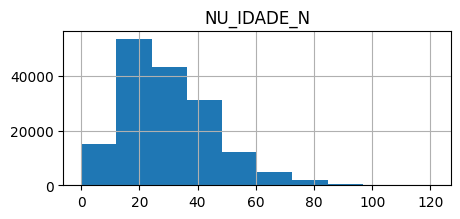

In [40]:
# Histograma

df_woman.hist(figsize = (5,2))
plt.show()

Nota-se que há uma predominância de eventos em mulheres na faixa etária dos 20 anos de idade.

##### 3.3.1.2 Variável Idade - Gráfico de Densidade

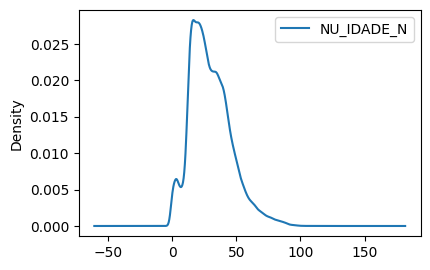

In [41]:
# Gráfico de Densidade

df_woman.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))

plt.show()

O gráfico de densidade não se mostrou uma boa alternativa, visto que nao se consegue visualizar a faixa, apenas que o pico acontece entre 0 e 50.

##### 3.3.1.3 Variável Idade - Boxplot

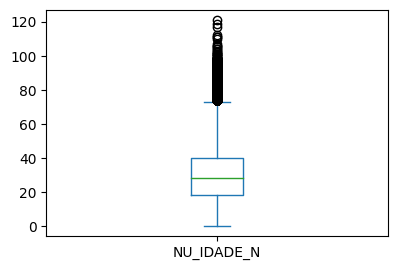

In [42]:
# Boxplot

df_woman.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

O boxplot mostrou que há alguns valores fora da faixa (a cima de 100, por exemplo), ou seja, pode-se afirmar a **presença de possíveis outliers**.

#### 3.2.2 Variáveis Qualitativas

Variáveis qualitativas (ou categóricas) referem-se a tipos de dados que representam características ou qualidades não numéricas. Elas descrevem qualidades ou atributos e são frequentemente expressas em palavras ou categorias, não em valores numéricos. São divididas em:

*   Nominais - Representam categorias **sem uma ordem específica ou hierarquia**.
Exemplos: cores (vermelho, azul, verde), gênero (masculino, feminino), estado civil (solteiro, casado, divorciado)

*   Ordinais - Possuem categorias que **têm uma ordem ou hierarquia específica**.
Exemplos: níveis de concordância (discordo totalmente, discordo, neutro, concordo, concordo totalmente), níveis de educação (ensino fundamental, ensino médio, graduação, pós-graduação)

Os principais tipos de gráficos utilizados em variáveis qualitativas são:

*    Gráfico de Pizza
*    Gráfico de Barras / Colunas

Como na análise de violência contra a mulher no estado de Minas Gerais possui apenas 1 variável quantitativa e todas as outras qualitativas, pode-se utilizar algorítimos e métodos focados neste tipo de variável.

##### 3.2.2.1 Distribuição de Frequencia
Nesta etapa, será executado a verificação das variáveis categoricas presentes nas variáveis, permitindo entender a distribuição das diferentes categorias em cada uma dessas variáveis. A partir dessas contagens, pode-se avançar para análises mais detalhadas das relações entre essas variáveis categóricas.
**Para valores categóricos com poucas categorias, usou-se o gráfico de pizza, para valores cateógóricos com muitas cateogiras, usou-se o grafico de barras**

###### 3.2.2.1.1 Distribuição de Raça

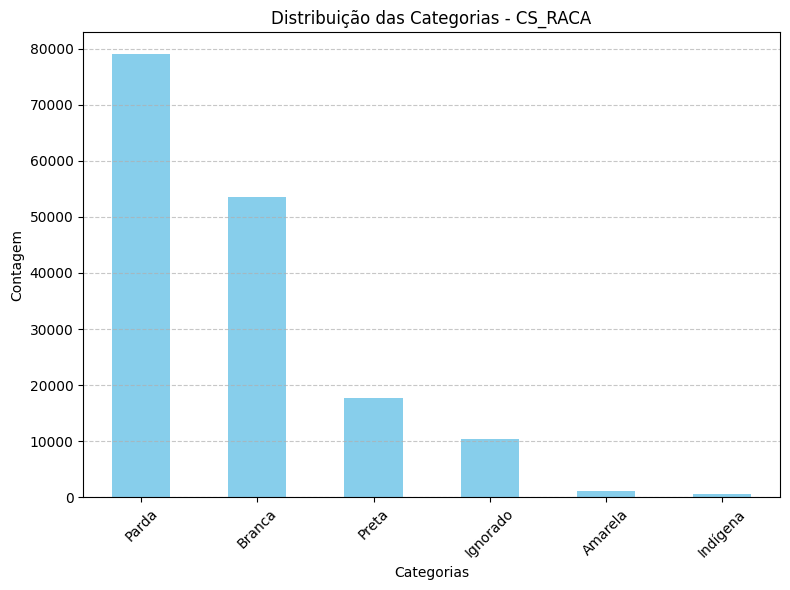

In [43]:
# Realiza a contagem de cada variável categórica

contagem_raca = df_woman['CS_RACA'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
contagem_raca.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Categorias - CS_RACA')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade horizontal
plt.tight_layout()
plt.show()

O primeiro insight que é possivel ser tirado é que mulheres pardas sofrem muito mais agressão do que mulheres de outras raças.
De acordo com o gráfico gerado a cima, nota-se que existe a seguinte divisão em relação as agressões:

*      Parda: 47,16%
*      Branca: 32,02%
*      Preta: 10,56%
*      Ignorado: 6,06%
*      Amarela: 0,68%
*      Indígena: 0,33%

De acordo com IBGE (Instituto Brasileiro de Geografia e Estatística), no ano de 2022, cerca de 45,5% da população brasileira é parda e, também levando em consideração que 51,48% da população brasileira é parda, leva-se a uma conconclusão de que há 23,41% de mulheres pardas.
Também de acordo com o IBGE (Instituto Brasileiro de Geografia e Estatística), no ano de 2022, cerca de 46.3% da população brasileira é branca (menor que a parda) e, também levando em consideração que 51,48% da população brasileira é parda, leva-se a uma conconclusão de que há 23,84% de mulheres pardas.
Com isto, conclui-se que, mesmo a raça branca de pessoas no sexo feminino seja levemente mais elevada quando comparando com a raça parda, quando se é falado em relação a agressão contra a mulher, **conclui-se que há 15,14% mais agressões em mulheres pardas do que em mulheres brancas.**

###### 3.2.2.1.2 Distribuição de Ocorrência

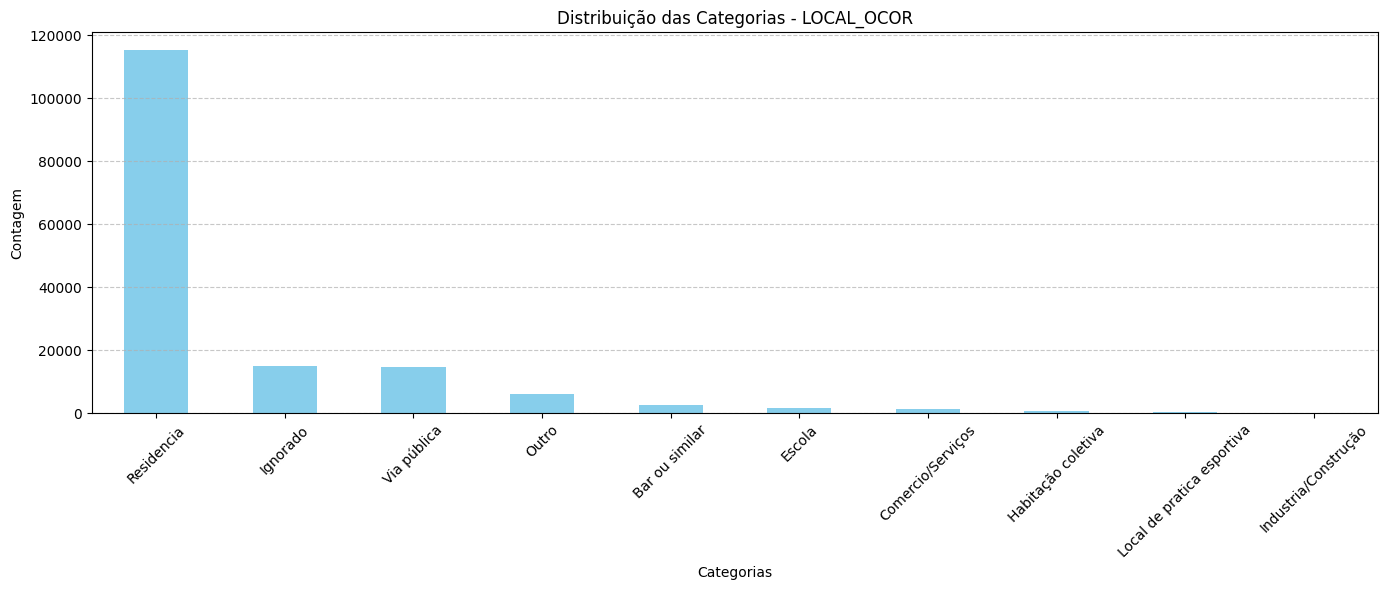

In [44]:
# Distribuição de Ocorrência

contagem_local_ocorr = df_woman['LOCAL_OCOR'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(14, 6))  # Define o tamanho da figura
contagem_local_ocorr.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Categorias - LOCAL_OCOR')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade horizontal
plt.tight_layout()
plt.show()

Em relação a distribuição do local da ocorrência, nota-se a seguinte distribuição:

*      Residência: 71.52%
*      Ignorado: 9.39%
*      Via pública: 9.20%
*      Outro: 3.76%
*      Bar ou similar: 1.64%
*      Escola: 1.12%
*      Comércio/Serviços: 0.86%
*      Habitação coletiva: 0.48%
*      Local de prática esportiva: 0.17%
*      Indústria/Construção: 0.08%

**Dentro de casa é o local em que se ocorrem mais violências contra a mulher**, logo, dentro da própria família. Tornando ainda mais difícil encontrar soluções para suportar estas pessoas.

###### 3.2.2.1.3 Distribuição de se houve agressões outras vezes

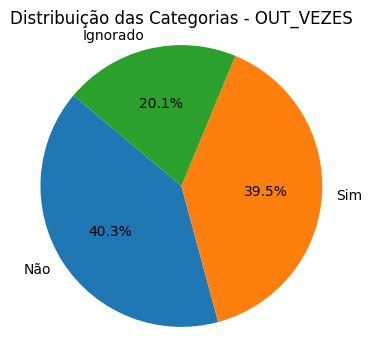

In [45]:
#Distribuição de se houve agressões outras vezes

contagem_out_vezes = df_woman['OUT_VEZES'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_out_vezes, labels=contagem_out_vezes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - OUT_VEZES')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()

De acordo com a análise a cima, quando comparando se houve outras agressões, quase de 40% da população de mulheres que sofreram agressões alegam que foram violentadas . Isso **pode** mostrar que a maior parte das **mulheres agredidas permanecem no local ou na relação em que sofrem agressões por um tempo maior e não se afastam / procuram ajuda logo após o primeiro incidente.**

###### 3.2.2.1.4 Distribuição de Eventos com Lesões Corporais

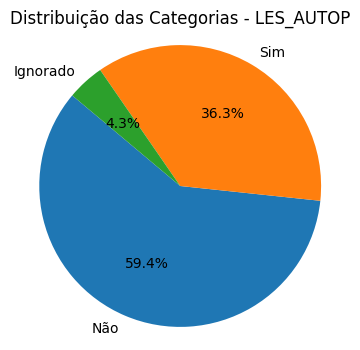

In [46]:
# Distribuição de se houve lesões corporais

contagem_les_autop = df_woman['LES_AUTOP'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_les_autop, labels=contagem_les_autop.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - LES_AUTOP')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()

De acordo com a análise a cima, como a maioria dos eventos de agressão não houve necessidade de atendimento médico devido a lesões corporais, pode significar que a agressão física não é a mais comum entre os tipos de agressão. **Vale uma análise mais profunda em relação a tipologia da agressão.**

###### 3.2.2.1.5 Distribuição de se Houve Violência Física

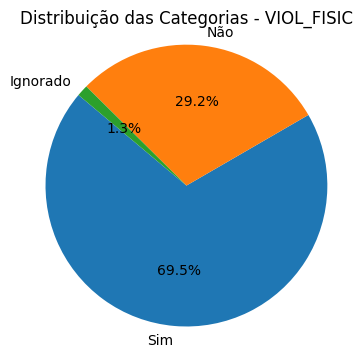

In [47]:
# Distribuição de se houve violencia física

contagem_viol_fisica = df_woman['VIOL_FISIC'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_viol_fisica, labels=contagem_viol_fisica.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - VIOL_FISIC')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()


O gráfico a cima representa que a **maioria dos eventos de violência contra as mulheres possui violência física**, beirando 70%.

###### 3.2.2.1.6 Distribuição de se Houve Violência Psicológica

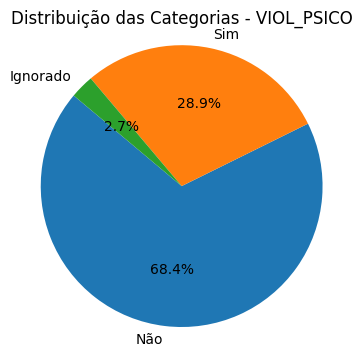

In [48]:
# Distribuição de se houve violencia psicologica

contagem_viol_psico = df_woman['VIOL_PSICO'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_viol_psico, labels=contagem_viol_psico.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - VIOL_PSICO')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()

O gráfico a cima representa que a **maioria dos eventos de violência contra as mulheres não possui violência psicológica**, beirando aos 70%.

###### 3.2.2.1.7 Distribuição de se Houve Violência Sexual

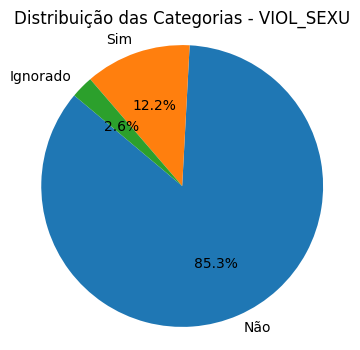

In [49]:
# Distribuição de se houve violencia sexual

contagem_viol_sexu = df_woman['VIOL_SEXU'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_viol_sexu, labels=contagem_viol_sexu.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - VIOL_SEXU')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()

O gráfico a cima representa que a **maioria dos eventos de violência contra as mulheres não possui violência sexual**.

###### 3.2.2.1.8 Distribuição de Número de Envolvidos

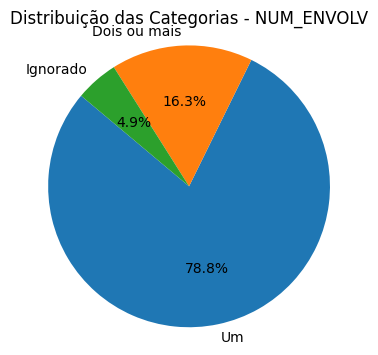

In [50]:
# Distribuição de numero de envolvidos

contagem_num_envolv = df_woman['NUM_ENVOLV'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_num_envolv, labels=contagem_num_envolv.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - NUM_ENVOLV')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()

O gráfico a cima representa que a **maioria dos eventos de violência contra as mulheres possui "apenas" um agressor**, beirando aos 80%.

###### 3.2.2.1.9 Distribuição do Sexo do Autor

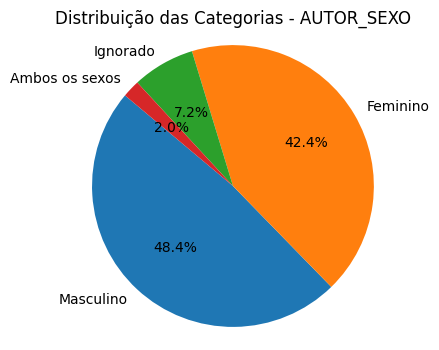

In [51]:
# Distribuição de sexo do autor

contagem_autor_sexo = df_woman['AUTOR_SEXO'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(contagem_autor_sexo, labels=contagem_autor_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias - AUTOR_SEXO')
plt.axis('equal')  # Garante que o gráfico seja uma circunferência, não uma elipse
plt.show()

Na análise a cima é possivel encontrar um insight diferente. Há uma quantidade elevada de agressores do sexo feminino também. Com isso, **é interessante se aprofundar na orientação sexual dos autores femininos para entender se a agressão vem de entes familiares (como mães ou irmãs) ou de companheiras.**

###### 3.2.2.1.10 Distribuição da Orientação Sexual do Autor

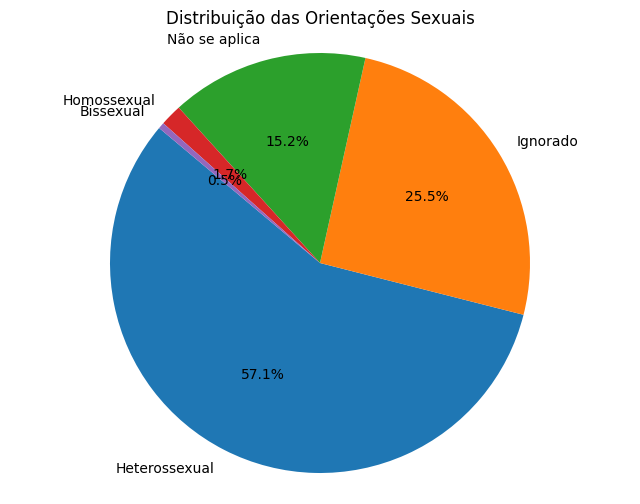

In [52]:
# Distribuição de orientação sexual

contagem_orientacao_sex = df_woman['ORIENT_SEX'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.pie(contagem_orientacao_sex, labels=contagem_orientacao_sex.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.title('Distribuição das Orientações Sexuais')
plt.show()

De acordo com a análise a cima, a grande maioria da orientação sexual dos autores é heterossexual.
Como já mencionado na análise da distribuição do sexo do autor, será **interessante se aprofundar na orientação sexual dos autores femininos para entender se a agressão vem de entes familiares (como mães ou irmãs) ou de companheiras.**

###### 3.2.2.1.11 Distribuição da Identidade de Gênero

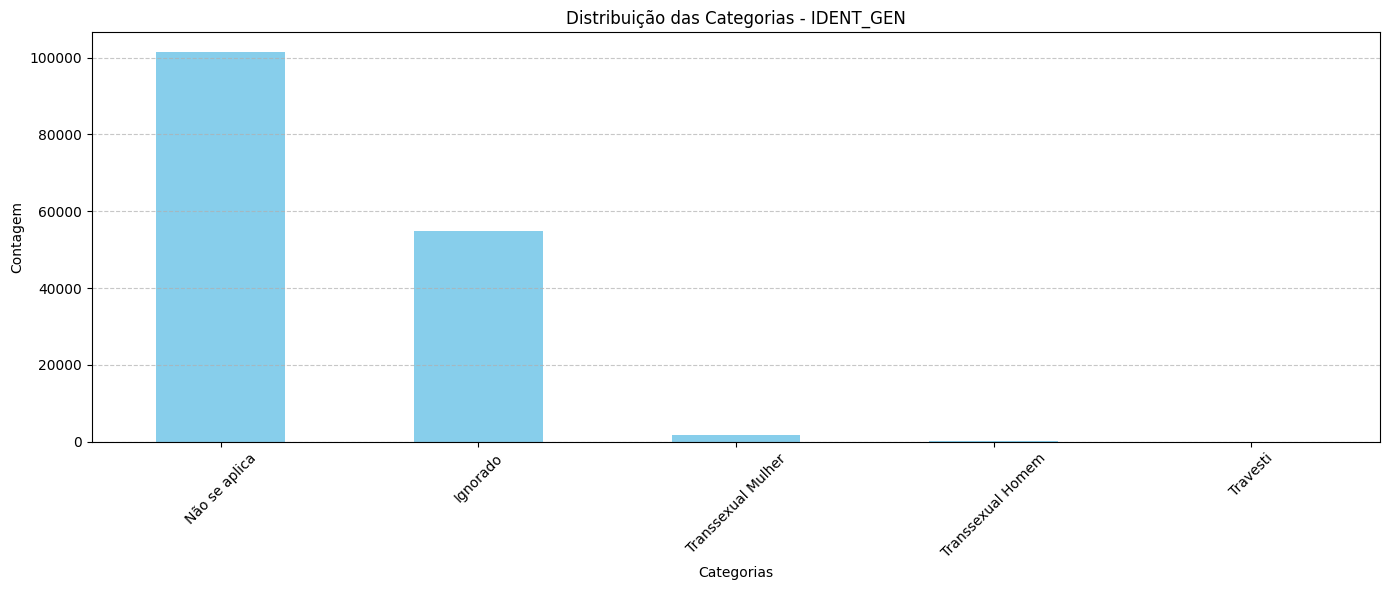

In [53]:
# Distribuição de identidade de gênero

contagem_id_gen = df_woman['IDENT_GEN'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(14, 6))  # Define o tamanho da figura
contagem_id_gen.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Categorias - IDENT_GEN')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas de grade horizontal
plt.tight_layout()
plt.show()

O gráfico a cima nos mostra a falta de dados relevantes para levar em consideração a distribuição da identidade de gênero dos autores. Por mais que isto nao tenha relação com o tema desta análise, **pode** indicar uma **falta de conhecimento em relação a termos sobre identidade de gênero da população, especificamente das mulheres que sofreram agressões**

##### 3.2.2.2 Análise de Associação
Após termos analisado individualmente a distribuição de frequência de cada variável categórica, o próximo passo é investigar as possíveis associações / correlações / relações entre essas variáveis.
Irá se utilizar o metodo de tabela cruzada para verificar a relação entre duas variáveis. É possível também utilizar alguns metodos estatisticos mais profundos **caso necessário**. São eles:

*    **Coeficiente Qui-Quadrado** - avaliar a diferença entre as frequências observadas e esperadas em dados categóricos, indicando se há associação entre variáveis em uma tabela de contingência. É usado para testar independência ou associação significativa entre variáveis categóricas, como gênero e preferência por produto, raça e resultado de pesquisa, sendo aplicável em áreas como pesquisa social, ciências biológicas e análise de dados categóricos.
*    **Coeficiente de Cramer** - usado para medir a associação entre variáveis categóricas em tabelas de contingência maiores que 2x2. Varia de 0 (sem associação) a 1 (associação completa)
*    **Teste de Associação de Fisher** - ferramenta poderosa para avaliar a associação entre duas variáveis categóricas em tabelas de contingência 2x2, onde cada variável tem duas categorias. Ele calcula a probabilidade de obter a distribuição de frequência observada sob a hipótese de independência entre as variáveis. Este teste é particularmente útil quando se lida com amostras pequenas e deseja-se determinar se a associação observada é estatisticamente significativa.
*    **Coeficiente de Contingência** - O coeficiente de contingência é uma medida de associação entre variáveis categóricas que varia de 0 a 1. Ele é uma generalização do coeficiente de Cramér V e é aplicável a tabelas de contingência maiores que 2x2. Esta medida leva em consideração o tamanho total da tabela, o que a torna útil para tabelas maiores.
*    **Coeficiente de Tschuprow** - O coeficiente de Tschuprow é aplicável quando se deseja medir a associação entre variáveis ordinais, ou seja, variáveis categóricas que têm uma ordem natural. Ele é uma extensão do coeficiente de Qui-Quadrado para variáveis ordinais e leva em consideração a ordem das categorias. Este coeficiente é valioso quando se analisam dados que possuem uma hierarquia intrínseca, como níveis de escolaridade ou classificações de satisfação do cliente.
*    **Coeficiente Phi** - Usado para medir a associação entre variáveis binárias em tabelas de contingência 2x2. É uma versão do coeficiente de Cramer para tabelas 2x2.


###### 3.2.2.2.1 Orientação Sexual vs Sexo dos Autores


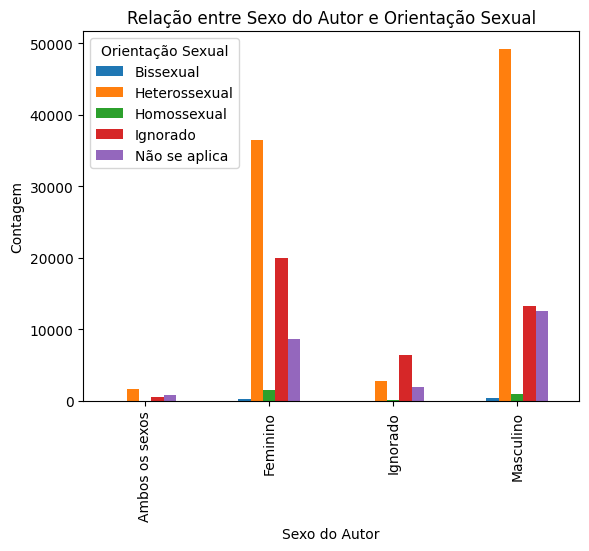

In [54]:
# Análise entre orientação sexual e sexo dos autores

sexo_autor_vs_orient_sexual = pd.crosstab(index = df_woman['AUTOR_SEXO'], columns = df_woman['ORIENT_SEX'])

# Plotagem do gráfico de barras
sexo_autor_vs_orient_sexual.plot(kind='bar')
plt.xlabel('Sexo do Autor')
plt.ylabel('Contagem')
plt.title('Relação entre Sexo do Autor e Orientação Sexual')
plt.legend(title='Orientação Sexual')
plt.show()

Com a análise a cima, nota-se que uma parcela muito pequena das autoras do sexo feminino são homossexuais. **Conclui-se que grande parte das agressões contra a mulher ocorrem em ambientes familiares ou entre supostas amigas.**

###### 3.2.2.2.2 Raça vs Local de Ocorrência


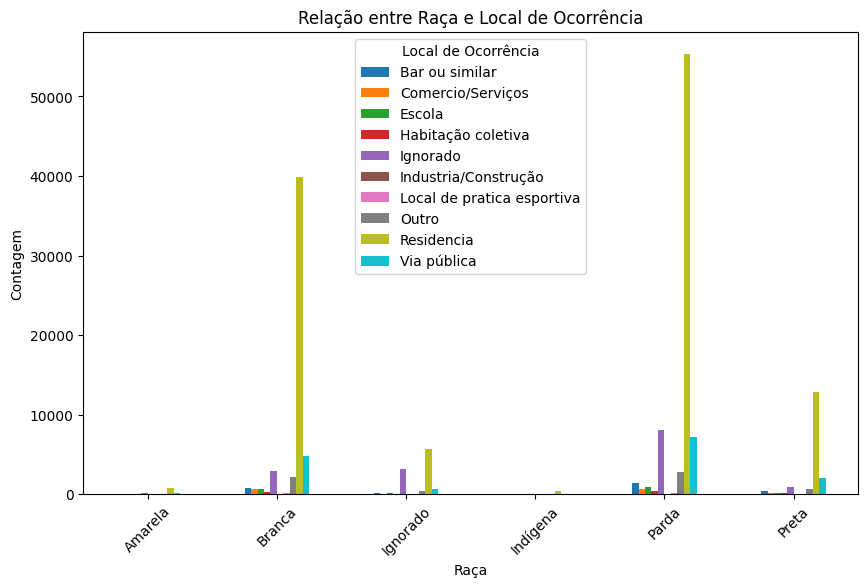

In [55]:
# Análise entre raça e local de ocorrência

raca_vs_local_ocorrencia = pd.crosstab(index = df_woman['CS_RACA'], columns = df_woman['LOCAL_OCOR'])

# Plotagem do gráfico de barras
raca_vs_local_ocorrencia.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.title('Relação entre Raça e Local de Ocorrência')
plt.legend(title='Local de Ocorrência')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Na análise de correlação a cima, nota-se que para a raça parda, mesmo que o local de ocorrência continue sendo a residencia (assim como em todas as outras raças), **a raça parda a raça em que possui mais agressões em vias públicas.**

###### 3.2.2.2.3 Violência Física vs Lesão Corporal


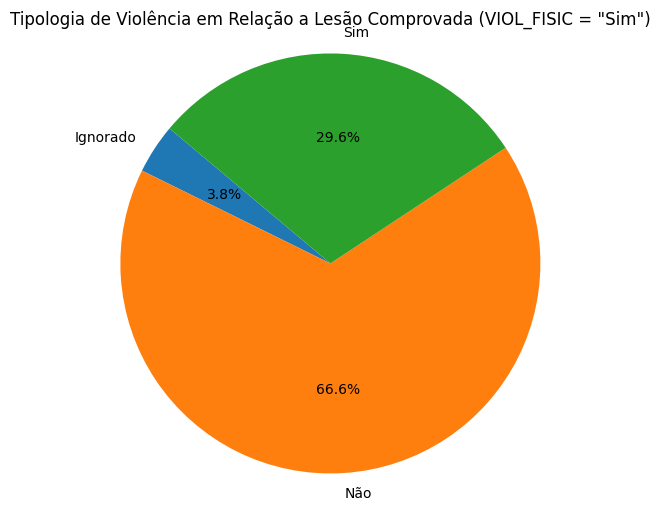

In [56]:
# Filtrando o DataFrame para incluir apenas os valores "Sim" em VIOL_FISIC
df_viol_fisic_filtered = df_woman[df_woman['VIOL_FISIC'] == 'Sim']

# Criando a tabela de contingência entre VIOL_FISIC e LES_AUTOP após o filtro
tipologia_violencia = pd.crosstab(index=df_viol_fisic_filtered['VIOL_FISIC'], columns=df_viol_fisic_filtered['LES_AUTOP'])

# Verificando se há dados na tabela de contingência
if tipologia_violencia.empty:
    print("Não há dados para plotagem.")
else:
    # Obtendo os valores para as fatias do gráfico de pizza (unidimensional)
    values = tipologia_violencia.values.flatten()

    # Plotagem do gráfico de pizza
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=tipologia_violencia.columns, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Assegura que o gráfico de pizza seja um círculo
    plt.title('Tipologia de Violência em Relação a Lesão Comprovada (VIOL_FISIC = "Sim")')
    plt.show()


Com a análise a cima, nota-se que a 66.7% das violências físicas contra a mulher não houve lesão corporal que necessitou de atendimento médico. Com isto, **é possivel apontar a alta probabilidade das agressões reportadas serem de cunho leve**.

#### 3.2.3 Variáveis Quantitativas vs Qualitativas
Agora, irá se realizar análises combinando a variável quantitativa com as categóricas (qualitativas).

##### 3.2.3.1 Análise de Associação
As análises de associações já foram iniciadas entre variáveis categóricas, agora, será realizado novamente, porém, combinando ambos os tipos de variáveis. No caso, como só se tem uma variável quantitativa idade, a associação sempre terá como base a idade.
Para analisar uma variável categórica com uma variável quantitativa, é possivel utilizar funções como groupby em combinação com estatísticas descritivas ou mesmo gráficos como boxplots ou barras para visualizar a relação entre essas variáveis.

###### 3.2.3.1.1 Idade vs Raça

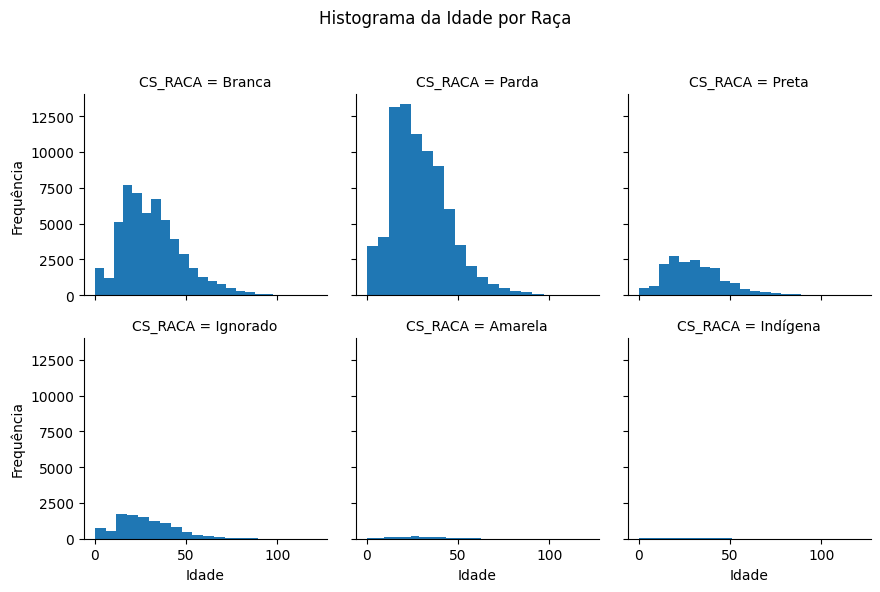

In [57]:
# Histograma

g = sns.FacetGrid(df_woman, col='CS_RACA', col_wrap=3)
g.map(plt.hist, 'NU_IDADE_N', bins=20)
g.set_axis_labels('Idade', 'Frequência')
plt.suptitle('Histograma da Idade por Raça')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [58]:
estatisticas_por_raca = df_woman.groupby('CS_RACA')['NU_IDADE_N'].describe()

estatisticas_por_raca

,count,mean,std,min,25%,50%,75%,max
CS_RACA,,,,,,,,
Amarela,1131.0,30.053050,15.443726,0.0,19.0,28.0,39.5,96.0
Branca,53506.0,31.208818,16.527970,0.0,19.0,29.0,41.0,103.0
Ignorado,10417.0,28.002880,16.203321,0.0,16.0,26.0,38.0,119.0
Indígena,566.0,23.540636,16.008436,0.0,11.0,22.0,34.0,85.0
Parda,79008.0,29.468029,15.427541,0.0,18.0,27.0,39.0,121.0
Preta,17751.0,30.747676,15.615674,0.0,19.0,29.0,40.0,111.0


Nota-se que para todas as raças, a faixa dos 20 anos de idade continua sendo a faixa em que ocorrem-se mais eventos de violência contra a mulher.

###### 3.2.3.1.2 Idade vs Violência Física

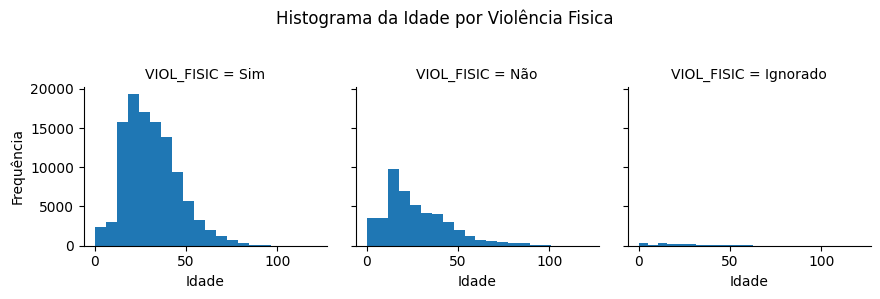

In [59]:
# Histograma

g = sns.FacetGrid(df_woman, col='VIOL_FISIC', col_wrap=3)
g.map(plt.hist, 'NU_IDADE_N', bins=20)
g.set_axis_labels('Idade', 'Frequência')
plt.suptitle('Histograma da Idade por Violência Fisica')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [60]:
estatisticas_por_viol_fisica = df_woman.groupby('VIOL_FISIC')['NU_IDADE_N'].describe()

estatisticas_por_viol_fisica

,count,mean,std,min,25%,50%,75%,max
VIOL_FISIC,,,,,,,,
Ignorado,2066.0,24.618103,19.478922,0.0,11.0,20.0,35.75,104.0
Não,46251.0,27.065123,17.857878,0.0,14.0,23.0,37.00,119.0
Sim,109924.0,31.424411,14.635790,0.0,20.0,30.0,40.00,121.0


Comparando a idade com eventos de violência fisica, **nota-se que existem valores mais elevados em idades menores (idade < 25 anos).**

###### 3.2.3.1.3 Idade vs Violência Psicológica

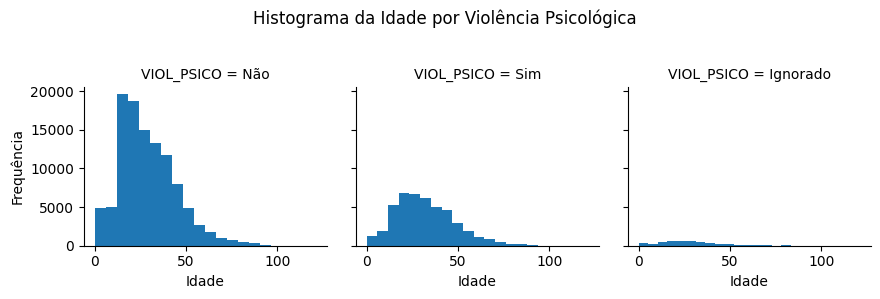

In [61]:
# Histograma

g = sns.FacetGrid(df_woman, col='VIOL_PSICO', col_wrap=3)
g.map(plt.hist, 'NU_IDADE_N', bins=20)
g.set_axis_labels('Idade', 'Frequência')
plt.suptitle('Histograma da Idade por Violência Psicológica')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [62]:
estatisticas_por_viol_psico = df_woman.groupby('VIOL_PSICO')['NU_IDADE_N'].describe()

estatisticas_por_viol_psico

,count,mean,std,min,25%,50%,75%,max
VIOL_PSICO,,,,,,,,
Ignorado,4315.0,27.644264,17.018663,0.0,16.0,25.0,37.0,104.0
Não,108237.0,29.273991,15.595015,0.0,18.0,27.0,39.0,121.0
Sim,45650.0,32.157262,16.133575,0.0,20.0,30.0,42.0,117.0


Comparando a idade com eventos de violência psicológica, **nota-se que o histograma é levemente mais continuo ao longo dos anos, ate meados dos 40~50 anos, diferentemente da violência físia em que é predominantemente em mulheres mais jovens.**

###### 3.2.3.1.4 Idade vs Violência Sexual

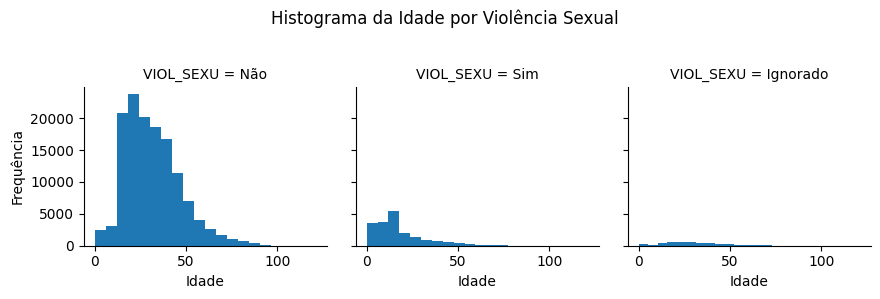

In [63]:
# Histograma

g = sns.FacetGrid(df_woman, col='VIOL_SEXU', col_wrap=3)
g.map(plt.hist, 'NU_IDADE_N', bins=20)
g.set_axis_labels('Idade', 'Frequência')
plt.suptitle('Histograma da Idade por Violência Sexual')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [64]:
estatisticas_por_viol_sexu = df_woman.groupby('VIOL_SEXU')['NU_IDADE_N'].describe()

estatisticas_por_viol_sexu

,count,mean,std,min,25%,50%,75%,max
VIOL_SEXU,,,,,,,,
Ignorado,4071.0,30.201916,16.186930,0.0,19.0,28.0,39.5,104.0
Não,134888.0,31.851358,15.242562,0.0,20.0,30.0,41.0,121.0
Sim,19234.0,17.476708,14.171833,0.0,8.0,13.0,23.0,119.0


Comparando a idade com eventos de violência sexual, **nota-se que os valores do histograma são predominantemente mais elevados consideramente mais jovens (faixa dos 15 aos 20 anos, media de 17), um aspecto importante visto que são em mulheres menores de idade.**

### 3.3 Insights Finais
Com as análises realizadas neste tópico, é possivel responder as perguntas incluidas no início do projeto:


1. **Qual o tipo mais comum de violência contra a mulher em Minas Gerais?**
R: O tipo mais comum de violência contra a mulher no estado de Minas Gerais é a violência física. Predominantemente ocorrida em mulheres na faixa dos 20 anos de idade.

2. **Existe uma faixa etária em que a ocorrência de violência contra a mulher é mais frequente?**
R: Sim. A faixa dos 20 anos de idade é a mais comum. Porém, notou-se algumas diferenças em relação ao tipo de violência (fisica, psicologica e sexual). Para violência física a faixa dos 20 anos é mais comum. Para violência psicológica a faixa etaria se mantém mais estável ao longo dos anos. Por fim para violência sexual a faixa etaria mais comum é entre 15 e 20 anos.

3. **Qual o local de ocorrência mais comum de violência contra a mulher?**
R: O local mais comum de ocorrência de violência contra a mulher é na própria residência.


4. **Os eventos de violência são pontuais? Existiram outras agressões?**
R: Cerca de 40% das agressões são pontuais, porém, outros 40% apontaram que já houveram outras ocorrências anteriores.


5. **Em relação a raça das vítimas, existe alguma predominante?**
R: Sim, mulheres pardas são as vitimas que mais sofrem violência, seguidas por mulheres brancas.   

É importante salientar que outros insights também foram descobertos. Estes estão descritos na análise descritiva.


## 4 Pré Processamentos dos Dados

O pré-processamento de dados é uma etapa fundamental na análise de dados, envolvendo a limpeza, transformação e organização dos dados brutos. Esse processo visa garantir a qualidade, consistência e preparação adequada dos dados para análises subsequentes, impactando diretamente na precisão e confiabilidade dos resultados obtidos.

### 4.1 Transformação Para Binário

Transformar dados categóricos em numéricos é crucial para a análise de dados e a construção de modelos. Essa transformação permite que algoritmos de machine learning processem esses dados, já que muitos algoritmos requerem entradas numéricas.

Ao lidar com variáveis categóricas sem uma relação de ordem natural, como cores, tipos de produtos ou categorias não hierárquicas, o Label Encoder não é a melhor escolha. Ele atribui valores numéricos sequenciais, o que pode introduzir uma ordem artificial nos dados. Nesses casos, o One-Hot Encoding, que transforma as categorias em variáveis binárias separadas, é mais apropriado. Ele preserva a independência das categorias e evita a introdução de uma ordem que não existe nos dados originais, sendo uma opção mais adequada para modelos de machine learning.

In [65]:
colunas_categoricas = [
    'CS_SEXO', 'CS_RACA',
    'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC', 'VIOL_PSICO',
    'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX', 'IDENT_GEN'
]

# Aplicando one-hot encoding em todas as colunas categóricas
df_encoded = pd.get_dummies(df_woman, columns=colunas_categoricas)


# Modificando os nomes das colunas para caixa alta
df_encoded.columns = df_encoded.columns.str.upper()


# Remove acentos dos nomes das colunas
def remover_acentos(s):
    return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

df_encoded.columns = [remover_acentos(col).upper() for col in df_encoded.columns]


# Substitui espaços por underscores nos nomes das colunas
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')



# Visualizando as primeiras linhas do novo DataFrame com as colunas codificadas
df_encoded.head()

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,ID_MN_RESI,CS_SEXO_FEMININO,CS_RACA_AMARELA,CS_RACA_BRANCA,CS_RACA_IGNORADO,CS_RACA_INDIGENA,CS_RACA_PARDA,...,ORIENT_SEX_BISSEXUAL,ORIENT_SEX_HETEROSSEXUAL,ORIENT_SEX_HOMOSSEXUAL,ORIENT_SEX_IGNORADO,ORIENT_SEX_NAO_SE_APLICA,IDENT_GEN_IGNORADO,IDENT_GEN_NAO_SE_APLICA,IDENT_GEN_TRANSSEXUAL_HOMEM,IDENT_GEN_TRANSSEXUAL_MULHER,IDENT_GEN_TRAVESTI
0,2023-01-02,2008-03-21,14.0,Rio Novo,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2023-01-01,1976-11-29,46.0,Carmo do Rio Claro,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2023-01-02,1997-05-10,25.0,Pirapora,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2023-01-02,1982-10-02,40.0,Várzea da Palma,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2023-01-03,2016-11-10,6.0,Guaraciaba,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [66]:
colunas_dropadas_encoded = [
    'DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'ID_MN_RESI'
]

# Drop das colunas nao utilizadas do dataframe binário df_encoded
df_encoded_droped = df_encoded.drop(colunas_dropadas_encoded, axis = 1)

df_encoded_droped

,CS_SEXO_FEMININO,CS_RACA_AMARELA,CS_RACA_BRANCA,CS_RACA_IGNORADO,CS_RACA_INDIGENA,CS_RACA_PARDA,CS_RACA_PRETA,LOCAL_OCOR_BAR_OU_SIMILAR,LOCAL_OCOR_COMERCIO/SERVICOS,LOCAL_OCOR_ESCOLA,...,ORIENT_SEX_BISSEXUAL,ORIENT_SEX_HETEROSSEXUAL,ORIENT_SEX_HOMOSSEXUAL,ORIENT_SEX_IGNORADO,ORIENT_SEX_NAO_SE_APLICA,IDENT_GEN_IGNORADO,IDENT_GEN_NAO_SE_APLICA,IDENT_GEN_TRANSSEXUAL_HOMEM,IDENT_GEN_TRANSSEXUAL_MULHER,IDENT_GEN_TRAVESTI
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38771,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
38772,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
38773,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
38774,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### 4.2 Concatenação do Dataset
Agora, será dropado as colunas da lista "colunas_categoricas" criada no passo anterior e adicionado as novas colunas em binário.


In [67]:
colunas_categoricas = [
    'CS_SEXO', 'CS_RACA',
    'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC', 'VIOL_PSICO',
    'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX', 'IDENT_GEN'
]


# Drop das colunas de df_encoded que estão em colunas_categoricas de df_woman
df_woman_sem_categoricas = df_woman.drop(colunas_categoricas, axis=1)

df_woman_sem_categoricas

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,ID_MN_RESI
0,2023-01-02,2008-03-21,14.0,Rio Novo
1,2023-01-01,1976-11-29,46.0,Carmo do Rio Claro
2,2023-01-02,1997-05-10,25.0,Pirapora
3,2023-01-02,1982-10-02,40.0,Várzea da Palma
4,2023-01-03,2016-11-10,6.0,Guaraciaba
...,...,...,...,...
38771,08/03/2019,02/08/1983,35.0,Porteirinha
38772,21/05/2019,31/05/2002,16.0,Porteirinha
38773,20/05/2019,31/03/2007,12.0,Cláudio
38774,19/09/2019,29/01/1986,32.0,Nova Lima


Por fim, é possível concatenar o dataframe binário com o dataframe inicial, criando-se assim um novo df_woman.

In [68]:
# Redefinindo os índices dos DataFrames antes da concatenação
df_woman_sem_categoricas.reset_index(drop=True, inplace=True)
df_encoded_droped.reset_index(drop=True, inplace=True)

# Concatenando os DataFrames novamente
df_woman = pd.concat([df_woman_sem_categoricas, df_encoded_droped], axis=1)

# Visualizando as primeiras linhas do DataFrame resultante
df_woman.head(5)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,ID_MN_RESI,CS_SEXO_FEMININO,CS_RACA_AMARELA,CS_RACA_BRANCA,CS_RACA_IGNORADO,CS_RACA_INDIGENA,CS_RACA_PARDA,...,ORIENT_SEX_BISSEXUAL,ORIENT_SEX_HETEROSSEXUAL,ORIENT_SEX_HOMOSSEXUAL,ORIENT_SEX_IGNORADO,ORIENT_SEX_NAO_SE_APLICA,IDENT_GEN_IGNORADO,IDENT_GEN_NAO_SE_APLICA,IDENT_GEN_TRANSSEXUAL_HOMEM,IDENT_GEN_TRANSSEXUAL_MULHER,IDENT_GEN_TRAVESTI
0,2023-01-02,2008-03-21,14.0,Rio Novo,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2023-01-01,1976-11-29,46.0,Carmo do Rio Claro,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2023-01-02,1997-05-10,25.0,Pirapora,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2023-01-02,1982-10-02,40.0,Várzea da Palma,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2023-01-03,2016-11-10,6.0,Guaraciaba,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


### 4.3 Verificação e Remoção de Nulls e NaNs

Na fase de Verificação e Remoção de Valores Ausentes durante o pré-processamento de dados, identificar e tratar valores nulos (nulls) ou NaNs é essencial. Esses valores podem surgir por erro na coleta ou ausência de informação. As estratégias incluem remover linhas/colunas ou preencher com estatísticas descritivas. A escolha depende do impacto nos dados e é crucial para análises precisas e modelos robustos.

<Axes: >

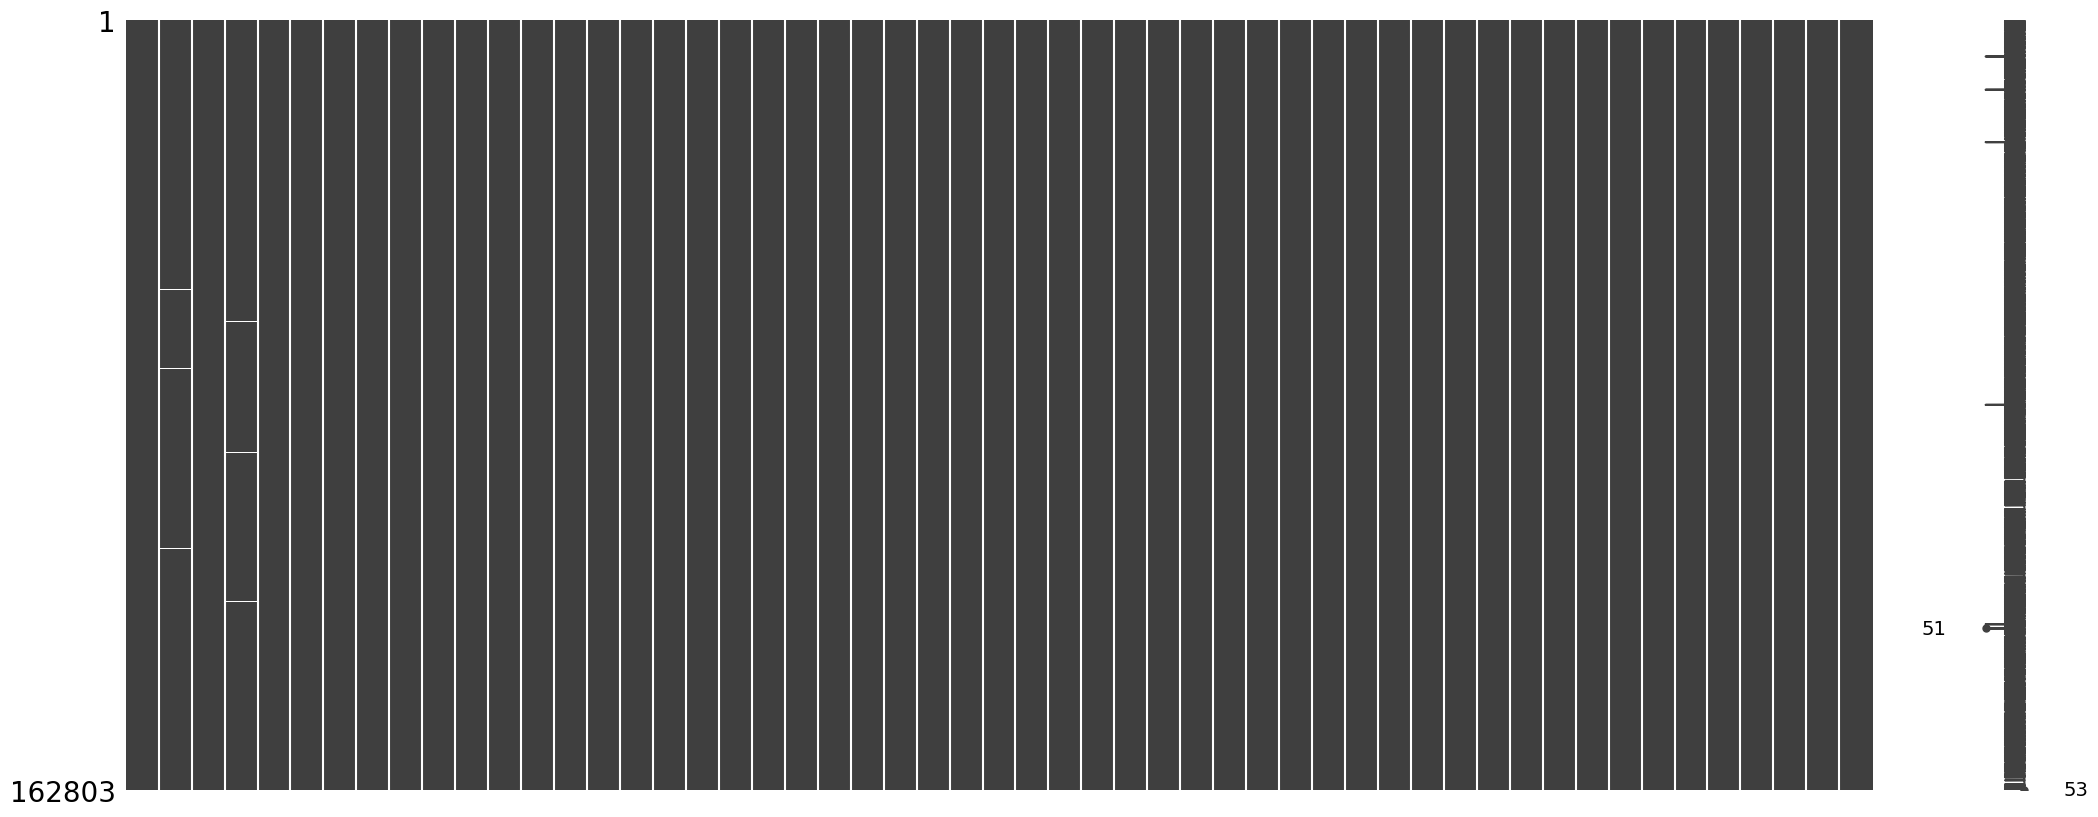

In [69]:
# Verificação dos valores Nan / Nulls / Missings

ms.matrix(df_woman)

In [70]:
# Tratamento de Valores Nan

# Como não há muitas linhas com valores Nan e são todas variáveis qualitativas, faz sentido remove-las do dataset

# Remove as linhas que contêm valores NaN em qualquer coluna

df_woman.dropna(inplace=True)

In [71]:
# Verificação se o código anterior foi concluido corretamente

nan_values = df_woman[df_woman.isna().any(axis=1)]
print("Valores NaN:")
print(nan_values)

Valores NaN:
Empty DataFrame
Columns: [DT_NOTIFIC, DT_NASC, NU_IDADE_N, ID_MN_RESI, CS_SEXO_FEMININO, CS_RACA_AMARELA, CS_RACA_BRANCA, CS_RACA_IGNORADO, CS_RACA_INDIGENA, CS_RACA_PARDA, CS_RACA_PRETA, LOCAL_OCOR_BAR_OU_SIMILAR, LOCAL_OCOR_COMERCIO/SERVICOS, LOCAL_OCOR_ESCOLA, LOCAL_OCOR_HABITACAO_COLETIVA, LOCAL_OCOR_IGNORADO, LOCAL_OCOR_INDUSTRIA/CONSTRUCAO, LOCAL_OCOR_LOCAL_DE_PRATICA_ESPORTIVA, LOCAL_OCOR_OUTRO, LOCAL_OCOR_RESIDENCIA, LOCAL_OCOR_VIA_PUBLICA, OUT_VEZES_IGNORADO, OUT_VEZES_NAO, OUT_VEZES_SIM, LES_AUTOP_IGNORADO, LES_AUTOP_NAO, LES_AUTOP_SIM, VIOL_FISIC_IGNORADO, VIOL_FISIC_NAO, VIOL_FISIC_SIM, VIOL_PSICO_IGNORADO, VIOL_PSICO_NAO, VIOL_PSICO_SIM, VIOL_SEXU_IGNORADO, VIOL_SEXU_NAO, VIOL_SEXU_SIM, NUM_ENVOLV_DOIS_OU_MAIS, NUM_ENVOLV_IGNORADO, NUM_ENVOLV_UM, AUTOR_SEXO_AMBOS_OS_SEXOS, AUTOR_SEXO_FEMININO, AUTOR_SEXO_IGNORADO, AUTOR_SEXO_MASCULINO, ORIENT_SEX_BISSEXUAL, ORIENT_SEX_HETEROSSEXUAL, ORIENT_SEX_HOMOSSEXUAL, ORIENT_SEX_IGNORADO, ORIENT_SEX_NAO_SE_APLICA, IDENT_G

<Axes: >

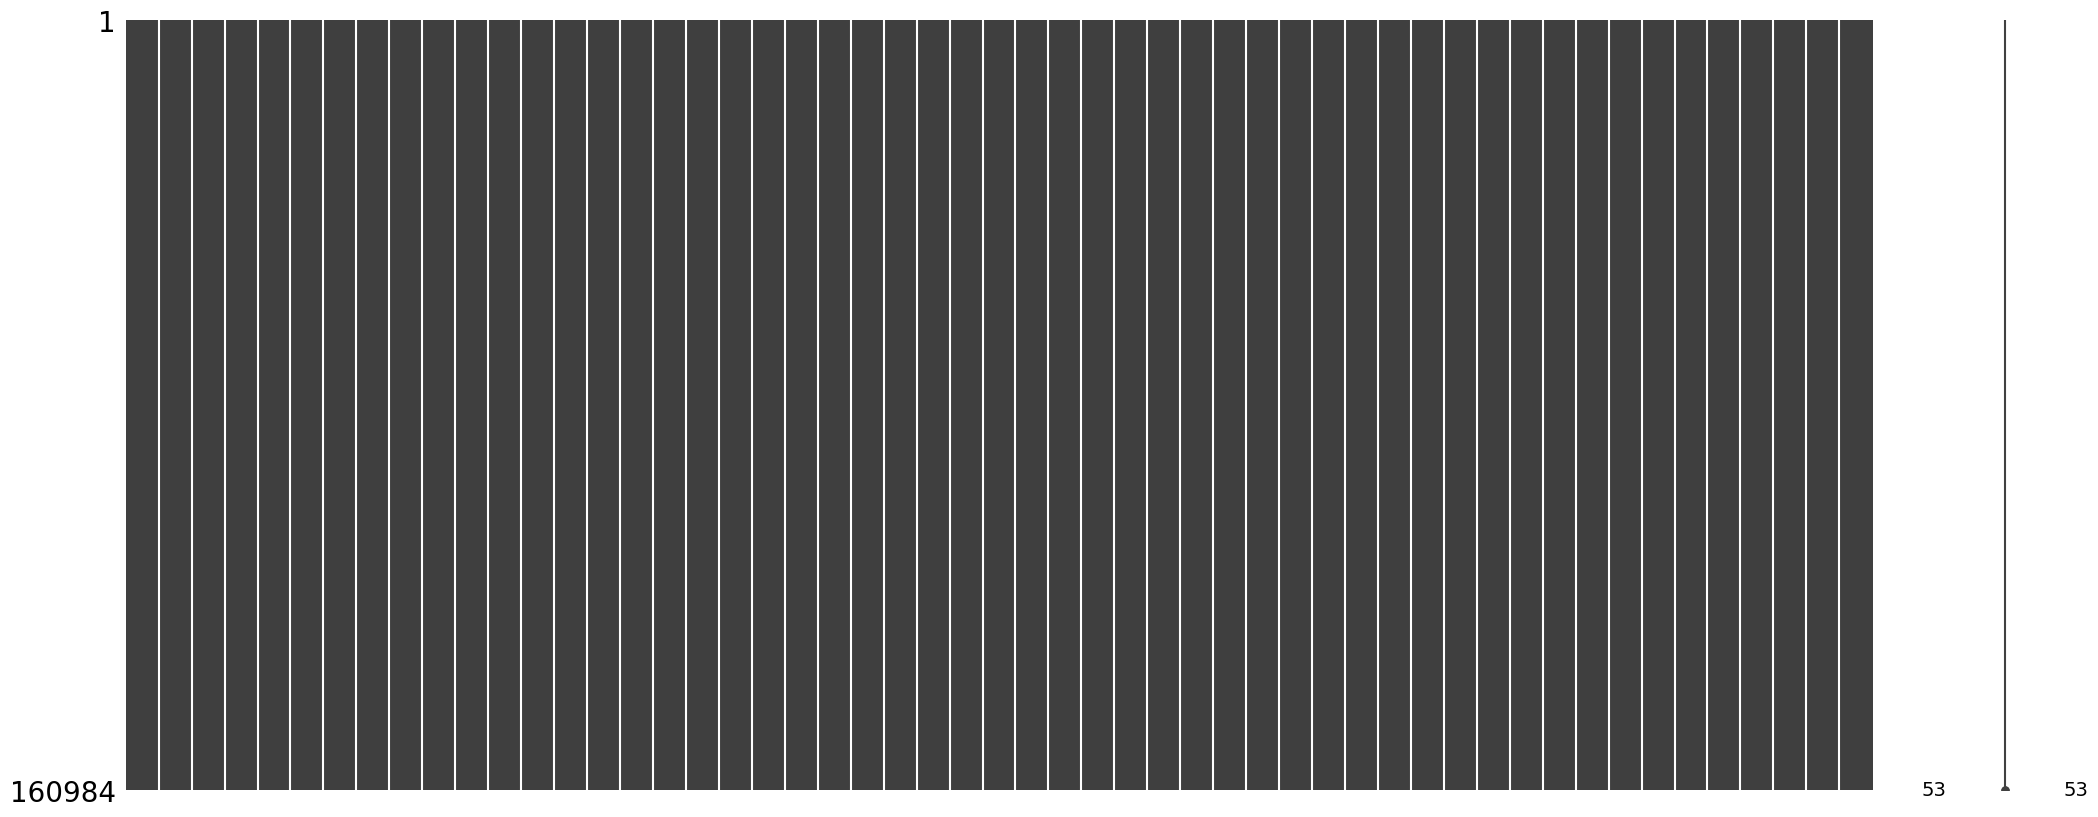

In [72]:
# Verificação se o código anterior foi concluido corretamente

ms.matrix(df_woman)

### 4.4 Remoção de Outliers
Um outlier é um valor atípico ou discrepante em um conjunto de dados, que se desvia significativamente do restante da distribuição, podendo distorcer análises estatísticas ou visualizações gráficas.
A remoção de outliers é o processo de identificar e eliminar pontos de dados que se afastam significativamente do padrão observado na maioria dos dados. Isso é feito para melhorar a precisão das análises estatísticas, modelagem ou visualização dos dados, eliminando valores extremos que podem distorcer os resultados e prejudicar a interpretação correta dos dados.
**Como já foi verificado, há outliers na coluna IDADE, pois há valores a cima de 100 (anos), chegando a 117. Como são poucos, estes valores serão removidos.**

In [73]:
# Remoção de Valores a cima de 100

df_woman = df_woman.drop(df_woman[df_woman['NU_IDADE_N'] >= 100].index)


In [74]:
# Verificação se o Drop foi correto

df_woman[df_woman['NU_IDADE_N'] > 100]

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,ID_MN_RESI,CS_SEXO_FEMININO,CS_RACA_AMARELA,CS_RACA_BRANCA,CS_RACA_IGNORADO,CS_RACA_INDIGENA,CS_RACA_PARDA,...,ORIENT_SEX_BISSEXUAL,ORIENT_SEX_HETEROSSEXUAL,ORIENT_SEX_HOMOSSEXUAL,ORIENT_SEX_IGNORADO,ORIENT_SEX_NAO_SE_APLICA,IDENT_GEN_IGNORADO,IDENT_GEN_NAO_SE_APLICA,IDENT_GEN_TRANSSEXUAL_HOMEM,IDENT_GEN_TRANSSEXUAL_MULHER,IDENT_GEN_TRAVESTI


### 4.5 Alteração da Tipologia dos Dados
 Essa transformação é crucial para garantir a compatibilidade com as técnicas analíticas utilizadas e para otimizar a precisão dos modelos. As colunas de data serão transformadas em datetime. Como os dados estão do float64 são números inteiros, será transformado float para int. Já os binários serão mantidos em uint8.

In [75]:
# Converter colunas do tipo 'float64' para inteiros
for col in df_woman.select_dtypes(include='float64').columns:
    df_woman[col] = df_woman[col].astype(int)

# Lista das colunas de data a serem convertidas para datetime
colunas_data = ['DT_NOTIFIC', 'DT_NASC']  # Adicione aqui outras colunas de data, se necessário

# Converter colunas para o tipo datetime
for col in colunas_data:
    df_woman[col] = pd.to_datetime(df_woman[col])

# Agora as colunas do tipo 'float64' foram convertidas para inteiros
# E as colunas de data ('DT_NOTIFIC', 'DT_NASC', etc.) foram convertidas para datetime

<ipython-input-75-892ece9e8210>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_woman[col] = pd.to_datetime(df_woman[col])
<ipython-input-75-892ece9e8210>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_woman[col] = pd.to_datetime(df_woman[col])


In [76]:
valores_nulos = df_woman[df_woman.isnull().any(axis=1)]
valores_nulos

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,ID_MN_RESI,CS_SEXO_FEMININO,CS_RACA_AMARELA,CS_RACA_BRANCA,CS_RACA_IGNORADO,CS_RACA_INDIGENA,CS_RACA_PARDA,...,ORIENT_SEX_BISSEXUAL,ORIENT_SEX_HETEROSSEXUAL,ORIENT_SEX_HOMOSSEXUAL,ORIENT_SEX_IGNORADO,ORIENT_SEX_NAO_SE_APLICA,IDENT_GEN_IGNORADO,IDENT_GEN_NAO_SE_APLICA,IDENT_GEN_TRANSSEXUAL_HOMEM,IDENT_GEN_TRANSSEXUAL_MULHER,IDENT_GEN_TRAVESTI


In [77]:
# Verificação se a alterção foi concluida corretamente

df_woman.dtypes

DT_NOTIFIC                               datetime64[ns]
DT_NASC                                  datetime64[ns]
NU_IDADE_N                                        int64
ID_MN_RESI                                       object
CS_SEXO_FEMININO                                  uint8
CS_RACA_AMARELA                                   uint8
CS_RACA_BRANCA                                    uint8
CS_RACA_IGNORADO                                  uint8
CS_RACA_INDIGENA                                  uint8
CS_RACA_PARDA                                     uint8
CS_RACA_PRETA                                     uint8
LOCAL_OCOR_BAR_OU_SIMILAR                         uint8
LOCAL_OCOR_COMERCIO/SERVICOS                      uint8
LOCAL_OCOR_ESCOLA                                 uint8
LOCAL_OCOR_HABITACAO_COLETIVA                     uint8
LOCAL_OCOR_IGNORADO                               uint8
LOCAL_OCOR_INDUSTRIA/CONSTRUCAO                   uint8
LOCAL_OCOR_LOCAL_DE_PRATICA_ESPORTIVA           

In [78]:
# Verificação do dataset

df_woman.head()

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,ID_MN_RESI,CS_SEXO_FEMININO,CS_RACA_AMARELA,CS_RACA_BRANCA,CS_RACA_IGNORADO,CS_RACA_INDIGENA,CS_RACA_PARDA,...,ORIENT_SEX_BISSEXUAL,ORIENT_SEX_HETEROSSEXUAL,ORIENT_SEX_HOMOSSEXUAL,ORIENT_SEX_IGNORADO,ORIENT_SEX_NAO_SE_APLICA,IDENT_GEN_IGNORADO,IDENT_GEN_NAO_SE_APLICA,IDENT_GEN_TRANSSEXUAL_HOMEM,IDENT_GEN_TRANSSEXUAL_MULHER,IDENT_GEN_TRAVESTI
0,2023-01-02,2008-03-21,14,Rio Novo,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2023-01-01,1976-11-29,46,Carmo do Rio Claro,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2023-01-02,1997-05-10,25,Pirapora,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2023-01-02,1982-10-02,40,Várzea da Palma,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2023-01-03,2016-11-10,6,Guaraciaba,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


### 4.5 Novos Atributos
Agora com as alterações feitas, pode-se verificar as novas informações do dataset abaixo. No dataset, tem-se:

*     Datetime - Para dados temporais com datas
*     int64 - Para números inteiros
*     uint8 - Para valores binários (sendo 0 = não / false, 1 = sim / true)

Novos Atributos:

1. **DT_NOTIFIC** - Data de Notificação do evento - datetime64
2. **DT_NASC** - Data de Nascimento - datetime64
3. **NU_IDADE_N** - Número da Idade - int64
4. **D_MN_RESI** - Identificação do Município de Residência - object
5. **CS_SEXO_FEMININO** - Sexo Feminino - uint8
6. **CS_RACA_AMARELA** - Raça Amarela - uint8
7. **CS_RACA_BRANCA** - Raça Branca - uint8
8. **CS_RACA_IGNORADO** - Raça Desconhecida - uint8
9. **CS_RACA_INDIGENA** - Raça Indígena - uint8
10. **CS_RACA_PARDA** - Raça Parda - uint8
11. **CS_RACA_PRETA** - Raça Preta - uint8
12. **LOCAL_OCOR_BAR_OU_SIMILAR** - Local de Ocorrência: Bar ou Similar - uint8
13. **LOCAL_OCOR_COMERCIO/SERVICOS** - Local de Ocorrência: Comércio/Serviços - uint8
14. **LOCAL_OCOR_ESCOLA** - Local de Ocorrência: Escola - uint8
15. **LOCAL_OCOR_HABITACAO_COLETIVA** - Local de Ocorrência: Habitação Coletiva - uint8
16. **LOCAL_OCOR_IGNORADO** - Local de Ocorrência: Desconhecido - uint8
17. **LOCAL_OCOR_INDUSTRIA/CONSTRUCAO** - Local de Ocorrência: Indústria/Construção - uint8
18. **LOCAL_OCOR_LOCAL_DE_PRATICA_ESPORTIVA** - Local de Ocorrência: Local de Prática Esportiva - uint8
19. **LOCAL_OCOR_OUTRO** - Local de Ocorrência: Outro - uint8
20. **LOCAL_OCOR_RESIDENCIA** - Local de Ocorrência: Residência - uint8
21. **LOCAL_OCOR_VIA_PUBLICA** - Local de Ocorrência: Via Pública - uint8
22. **OUT_VEZES_IGNORADO** - Outras Vezes: Desconhecido - uint8
23. **OUT_VEZES_NAO** - Outras Vezes: Não - uint8
24. **OUT_VEZES_SIM** - Outras Vezes: Sim - uint8
25. **LES_AUTOP_IGNORADO** - Lesão Autoprovocada: Desconhecido - uint8
26. **LES_AUTOP_NAO** - Lesão Autoprovocada: Não - uint8
27. **LES_AUTOP_SIM** - Lesão Autoprovocada: Sim - uint8
28. **VIOL_FISIC_IGNORADO** - Violação Física: Desconhecido - uint8
29. **VIOL_FISIC_NAO** - Violação Física: Não - uint8
30. **VIOL_FISIC_SIM** - Violação Física: Sim - uint8
31. **VIOL_PSICO_IGNORADO** - Violação Psicológica: Desconhecido - uint8
32. **VIOL_PSICO_NAO** - Violação Psicológica: Não - uint8
33. **VIOL_PSICO_SIM** - Violação Psicológica: Sim - uint8
34. **VIOL_SEXU_IGNORADO** - Violação Sexual: Desconhecido - uint8
35. **VIOL_SEXU_NAO** - Violação Sexual: Não - uint8
36. **VIOL_SEXU_SIM** - Violação Sexual: Sim - uint8
37. **NUM_ENVOLV_DOIS_OU_MAIS** - Número Envolvido: Dois ou Mais - uint8
38. **NUM_ENVOLV_IGNORADO** - Número Envolvido: Desconhecido - uint8
39. **NUM_ENVOLV_UM** - Número Envolvido: Um - uint8
40. **AUTOR_SEXO_AMBOS_OS_SEXOS** - Autor: Ambos os Sexos - uint8
41. **AUTOR_SEXO_FEMININO** - Autor: Feminino - uint8
42. **AUTOR_SEXO_IGNORADO** - Autor: Desconhecido - uint8
43. **AUTOR_SEXO_MASCULINO** - Autor: Masculino - uint8
44. **ORIENT_SEX_BISSEXUAL** - Orientação Sexual: Bissexual - uint8
45. **ORIENT_SEX_HETEROSSEXUAL** - Orientação Sexual: Heterossexual - uint8
46. **ORIENT_SEX_HOMOSSEXUAL** - Orientação Sexual: Homossexual - uint8
47. **ORIENT_SEX_IGNORADO** - Orientação Sexual: Desconhecida - uint8
48. **ORIENT_SEX_NAO_SE_APLICA** - Orientação Sexual: Não se Aplica - uint8
49. **IDENT_GEN_IGNORADO** - Identidade de Gênero: Desconhecida - uint8
50. **IDENT_GEN_NAO_SE_APLICA** - Identidade de Gênero: Não se Aplica - uint8
51. **IDENT_GEN_TRANSSEXUAL_HOMEM** - Identidade de Gênero: Transsexual Homem - uint8
52. **IDENT_GEN_TRANSSEXUAL_MULHER** - Identidade de Gênero: Transsexual Mulher - uint8
53. **IDENT_GEN_TRAVESTI** - Identidade de Gênero: Travesti - uint8

## 5 Conclusão
O projeto de ciência de dados sobre violência contra mulheres em Minas Gerais foi trabalhoso. A consolidação dos dados envolveu a concatenação de cinco dataframes, possibilitando uma visão abrangente e integrada do problema em questão.

**O primeiro ponto de atenção e também o mais relevante notado foi a baixíssima quantitadade de variáveis quantitativas e o alto número de variáveis qualitativas. Esta informação inicial liderou a construção da análise, visto que seriam gráficos, fórmulas e funções diferentes. Além disso, já se era sabido que as variáveis deveriam, em algum momento, serem transformadas em numéricas**

Durante a análise, foram utilizados diferentes tipos de gráficos, adequados à natureza das variáveis: qualitativas, quantitativas e suas combinações. Essa variedade permitiu uma representação visual detalhada dos dados, enriquecendo a compreensão do cenário de violência contra mulheres.

Cada gráfico gerado foi seguido por uma análise e descrição da mesma, fornecendo insights e levantando possíveis áreas de atenção. Além disso, foi-se encontrando possíveis problemas no dataset para que posteriormente possam ser tratados na etapa de pré processamento. Essa abordagem permitiu não apenas visualizar os dados, mas também extrair informações para orientar possíveis estratégias e políticas públicas futuras.

No processo, foi-se identificado valores Nulls e NaNs que demandaram tratamento. Foi-se optado por remover esses valores ausentes, preservando a integridade e confiabilidade das análises subsequentes.

Adicionalmente, a presença de outliers na faixa etária, ultrapassando os 100 anos e chegando até 117 anos de idade foi observada e tratada. A exclusão desses dados discrepantes foi importante para manter a consistência e a precisão das análises.

Além disso, a transformação da tipologia dos dados foi realizada de forma correta para que nao ocorram problemas durante análises futuras.

Em resumo, este projeto representa não apenas uma análise técnica de dados, mas também a dedicação em garantir a precisão e a relevância dos resultados. O compromisso com a limpeza dos dados, documentação detalhada e uma análise criteriosa foi fundamental para uma avaliação completa e abrangente do cenário de violência contra mulheres em Minas Gerais.